# Predictive Causality: Granger Causality Test

Prepared by: Carlo Vincienzo G. Dajac, Millicent H. Singson

In the first three chapters, we discussed the classical methods for both univariate and multivariate time series forecasting. We now introduce the notion of causality and its implications on time series analysis in general. We also describe a test for the linear VAR model discussed in the previous chapter.

## Learning Objectives

* Know how to perform Granger Causality Test.
* Identify Granger Causality Test assumptions and uses.
* Understand Granger Causality Test limitations and pitfalls.
* Learn when and when not to use the Granger Causality Test.

## Let's review

### Test Statistics

**Level of Significance $\alpha$, Confidence Interval and *p*-value**

*The decision to reject or not to reject a null hypothesis should be based on a specific level of significance. If we use level of significance $\alpha=0.05$, this means that we reject or not reject the null hypothesis with a 5% probability of error in our decision. This also means that we are 95% confident (CI = 1-$\alpha$) that our estimated coefficient is close to the true (unknown) parameter. If the computed p-value is less than or equal to set $\alpha = 0.05$, then we will reject the null hypothesis at a 5 percent level of significance.*

**t-test**: statistical association

*The t-value is a statistic that indicates whether an independent variable is statistically associated with a dependent variable.*

**F-test**: goodness of fit

*The F-test jointly examines whether the explanatory variables are statistically useful in explaining the variation in the dependent variable.*

**$R^2$ and Adjusted-$R^2$**: goodness of fit

*$R^2$ tells how much variation in the dependent variable is explained by the explanatory variable(s). On the other hand, an adjusted-$R^2$ imposes a higher penalty to add a new variable in a regression model compared to an $R^2$. If you have a multiple regression model, it is better to consider adjusted-$R^2$ because it takes into account the fact that more variables are need to account for the variation in the dependent variable.*

**White noise/Autocorrelation detection tests**

*If errors follow a normal distribution with a mean of zero and a constant variance, then we call the error term white noise. If the error term is white noise, there is no autocorrelation (or no serial correlation) among the error terms. Having a white noise error implies that the error part does not contain any useful information that may improve the forecast/model. Below are two useful santadrd tests to verify whether errors are white noise or not.*

* *Durbin-Watson d-test*
* *Breusch-Godfrey serial correlation LM test*

**AIC and SIC**: model selection criteria

*The Akaike information criterion (AIC) and the Schwarz information criterion (SIC), also known as Bayesian information criterion (BIC) are two standard model selection criteria. The model with a smaller SIC and AIC would be the best among competitors.*

### Econometric Techniques

**Correlation Analysis**: reveal a linear association between two variables

*The correlation coefficient, with values between -1 and 1, is a measure of linear association between two variables.* 
* *correlation coefficient of +1: two variables are perfectly related in a positive linear direction*
* *correlation coefficient of −1: two variables are perfectly related in a negative linear direction*
* *correlation coefficient of zero: there is no linear relationship between the two variables*

**Regression Analysis**: examines whether the independent variable(s) explains any variation in the dependent variable


*We use $R^2$ and Adjusted-$R^2$ as the model selection criteria.*


**Important Note:** The correlation analysis and regression analysis provide a measure of statistical association between two or more variables. On the other hand, the Granger causality Test can help us determine the direction of the relationship  between two variables. All of these techniques assume the underlying dataset is stationary at level form.

## Granger Causality Test

Granger causality is a limited notion of causality where *past values of one series $(x_t)$ are useful for predicting future values of another series $(y_t)$*, after past values of $y_t$ have been controlled for. It is a method that aims to determine if a time series variable is likely to influence a change in another time series variable. The approach is to take different lags of one time series and use this to model the change in another time series.

### Clive W. J. Granger

Nobel Prize–winning British econometrician known for his contributions in nonlinear time series analysis. 

### Notations

$A_t$ : stationary stochastic process (*i.e.* mean and variance also do not change over time)

$\overline A_t$ : set of *past* values {${A_{t-j}, \; j=1,2,\ldots,\infty}$}
* $\overline A(k)$ : set {${A_{t-j}, \; j=k,k+1,\ldots,\infty}$}

$\overline{\overline A}_t$ : set of *past and present* values {${A_{t-j}, \; j=0,1,\ldots,\infty}$}


-----------------------------------------------------------------------------
$P_t (A|B)$: optimum, unbiased, least-squares predictor of $A_t$ using the set of values $B_t$
* Example: $P_t (X|\overline X)$ = optimum predictor of $X_t$ using only past $X_t$

$\varepsilon_t(A|B) = A_t - P_t(A|B)$ : predictive error series

$\sigma^2 (A|B)$ : variance of $\varepsilon_t(A|B)$

-----------------------------------------------------------------------------
$U_t$ : all the information in the universe accumulated since time $t-1$

$U_t - Y_t$ : all this information *apart* from the specified series $Y_t$
* Note: $Y_t$ is another stationary time series that is different from $X_t$

### Definitions

#### Causality

If $\sigma^2 (X|U) < \sigma^2 (X| \overline{U-Y})$, we say that $Y$ is causing $X$, denoted by $Y_t \implies X_t$. We say that $Y_t$ is causing $X_t$ if we are **able to predict** $X_t$ using all available information than if the information apart from $Y_t$ had been used.

#### Feedback
If $\sigma^2 (X|\overline U) < \sigma^2 (X| \overline{U-Y})$ and $\sigma^2 (Y|\overline U) < \sigma^2 (Y| \overline{U-X})$, we say that feedback is occurring, which is denoted by $Y_t \iff X_t$, i.e., **feedback is said to occur when $X_t$ is causing $Y_t$ and also $Y_t$ is causing $X_t$**.

#### Instantaneous Causality
If $\sigma^2 (X|\overline U, \overline{\overline Y}) < \sigma^2 (X| \overline U)$, we say that instantaneous causality $Y_t \implies X_t$ is occurring. In other words, the **current value of $X_t$ is better "predicted" if the present value of $Y_t$ is included** in the "prediction" than if it is not.

#### Causality Lag
If $Y_t \implies X_t$, we define the (integer) causality lag $m$ to be the least value of $k$ such that $\sigma^2 (X|U-Y(k)) < \sigma^2 (X|U-Y(k+1))$. Thus, knowing the values $Y_{t-j}, \; j=0,1,\ldots,m-1$ will be of no help in improving the prediction of $X_t$

### Assumptions

* $X_t$ and $Y_t$ are **stationary**.
    * **Separability**, i.e. information about a causative facotr is independently unique to that variable (e.g. information about predator effects is not contained in time series for the prey) and can be removed by eliminating that variable from the model.
* $P_t (A|B)$ is already optimized.


### Limitations

* We do not test a true cause and effect relationship. The fundamental reason we use Granger Causality Test is to know whether a particular variable comes before another in the time series.
    * *When econometricians say cause, what they mean is Granger-cause, although a more appropriate word might be precedence.*
* In practice, it will not usually be possibl to use completely optimum predictors, unless all sets of series are assumed to be normally distributed.

### Two-variable models

Let $X_t$ and $Y_t$ be stationary time series with zero means.

**Simple causal model**

$X_t = \sum \limits _{j=1} ^{m} a_j X_{t-j} + \sum \limits _{j=1} ^{m} b_j Y_{t-j} + \epsilon_t$

$Y_t = \sum \limits _{j=1} ^{m} c_j X_{t-j} + \sum \limits _{j=1} ^{m} d_j Y_{t-j} + \eta_t$

where: 
* $\epsilon_t, \eta_t$ uncorrelated white-noise series, i.e. $E[\epsilon_t,\epsilon_s]=E[\eta_t,\eta_s]=0$ and $s \neq t$
* m, assumed to be finite and smaller that the given time series

By definition of causality, $Y_t$ is causing $X_t$ if $b_j$ is not zero, and $X_t$ is causing $Y_t$ if $c_j$ is not zero. If both of these events occur, then there is a feedback relationship between $X$ and $Y$.

**General causal model with instantaneous causality**

$X_t + b_0 Y_{t}= \sum \limits _{j=1} ^{m} a_j X_{t-j} + \sum \limits _{j=1} ^{m} b_j Y_{t-j} + \epsilon_t$

$Y_t + c_0 X_{t} = \sum \limits _{j=1} ^{m} c_j X_{t-j} + \sum \limits _{j=1} ^{m} d_j Y_{t-j} + \eta_t$

### Hypothesis testing

Null $H_0$: There is no effect of other series, where $X_{t-1}$ on $Y_t$

Alternative $H_1$: There is significant effect of other series, where $X_{t-1}$ on $Y_t$

*If the null hypothesis is rejected, we can say that it is a case of Granger causality.*

## Applications

### Import libraries and set user-defined functions

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import lag_plot

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests

import warnings
warnings.filterwarnings("ignore")

In [2]:
def lag_plots(data_df):
    """
    If our data is random, this plot will have no pattern. 
    """
    s = len(data_df.columns)
    f, axs = plt.subplots(s, 1, figsize=(8, s*5))
    
    for i in range(s):
        lag_plot(data_df[data_df.columns[i]], ax=axs[i])
        axs[i].set_title(data_df.columns[i]);
        axs[i].set_ylabel('$y_{t+1}$');
        axs[i].set_xlabel('$y_t$');

    plt.tight_layout()

In [3]:
def kpss_test(data_df):
    """
    KKwiatkowski-Phillips-Schmidt-Shin (KPSS) test for stationarity
    
    """
    
    test_stat, p_val = [], []
    cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
    for c in data_df.columns: 
        kpss_res = kpss(data_df[c].dropna(), regression='ct')
        test_stat.append(kpss_res[0])
        p_val.append(kpss_res[1])
        cv_1pct.append(kpss_res[3]['1%'])
        cv_2p5pct.append(kpss_res[3]['2.5%'])
        cv_5pct.append(kpss_res[3]['5%'])
        cv_10pct.append(kpss_res[3]['10%'])
    kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 2.5%': cv_2p5pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=data_df.columns).T
    kpss_res_df = kpss_res_df.round(4)
    
    result = [] #compare p-value with alpha = 0.05
    for col in kpss_res_df.columns:
        if kpss_res_df.loc["p-value", col] < 0.05:
            result.append("not stationary")
        else:
            result.append("stationary")
    kpss_res_df.loc['result'] = result
    
    return kpss_res_df

In [4]:
def adf_test(data_df):
    """
    Augmented Dickey-Fuller (ADF) test for stationarity
    """
    
    test_stat, p_val = [], []
    cv_1pct, cv_5pct, cv_10pct = [], [], []
    for c in data_df.columns: 
        adf_res = adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
        cv_10pct.append(adf_res[4]['10%'])
    adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=data_df.columns).T
    adf_res_df = adf_res_df.round(4)

    result = [] #compare p-value with alpha = 0.05
    for col in adf_res_df.columns:
        if adf_res_df.loc["p-value", col] < 0.05:
            result.append("stationary")
        else:
            result.append("not stationary")
    adf_res_df.loc['result'] = result    
    
    return adf_res_df

In [5]:
def splitter(data_df):
    """
    Split dataset to set the first part as training set
    and the second part as test set
    """
    
    end = round(len(data_df)*0.8)
    train_df = data_df[:end]
    test_df = data_df[end:]
    
    return train_df, test_df

In [6]:
def select_p(train_df):
    """
    Select the VAR order  p  by computing the 
    different multivariate information criteria (AIC, BIC, HQIC), and FPE.
    """
    
    aic, bic, fpe, hqic = [], [], [], []
    model = VAR(train_df) 
    p = np.arange(1,60)
    for i in p:
        result = model.fit(i)
        aic.append(result.aic)
        bic.append(result.bic)
        fpe.append(result.fpe)
        hqic.append(result.hqic)
    lags_metrics_df = pd.DataFrame({'AIC': aic, 
                                    'BIC': bic, 
                                    'HQIC': hqic,
                                    'FPE': fpe}, 
                                   index=p)    
    fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
    lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
    plt.tight_layout()
    print(lags_metrics_df.idxmin(axis=0))

In [7]:
def granger_causation_matrix(data, variables, p, test = 'ssr_chi2test', verbose=False):
    
    """
    Check Granger Causality of all possible combinations of the time series.
    The rows are the response variables, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], p, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(p)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [8]:
def granger_conclusion(df_granger_matrix):
    x = df_granger_matrix.columns[0]
    y = df_granger_matrix.index[1]

    if df_granger_matrix.loc[y,x] < 0.05:
        print(f"{x} Granger causes {y}")
    else:
        print(f"{x} does NOT Granger {y}")

    x = df_granger_matrix.columns[1]
    y = df_granger_matrix.index[0]

    if df_granger_matrix.loc[y,x] < 0.05:
        print(f"{x} Granger causes {y}")
    else:
        print(f"{x} does NOT Granger {y}")

**Recall: Building a VAR model**

The following are the steps: 
1. Check for stationarity.
2. Split data into train and test sets.
3. Select the VAR order *p* that gives. 
4. Fit VAR model of order *p* on the train set. 
5. Generate forecast. 
6. Evaluate model performance. 

### Worked  Example : Ipo Dam Dataset

We will use the Ipo dataset in this example. It contains daily measurements of the following variables: rainfall (in millimeters), Oceanic Niño Index (ONI), NIA release flow (in cubic meters per second), and dam water level (in meters), respectively.

#### Import dataset

In [9]:
PATH = '../data/'
ipo_df = pd.read_csv(PATH + 'Ipo_dataset.csv', index_col='Time');
ipo_df = ipo_df.dropna()
ipo_df.head()

,Rain,ONI,NIA,Dam
Time,,,,
0,0.0,-0.7,38.225693,100.70
1,0.0,-0.7,57.996530,100.63
2,0.0,-0.7,49.119213,100.56
3,0.0,-0.7,47.034720,100.55
4,0.0,-0.7,42.223380,100.48


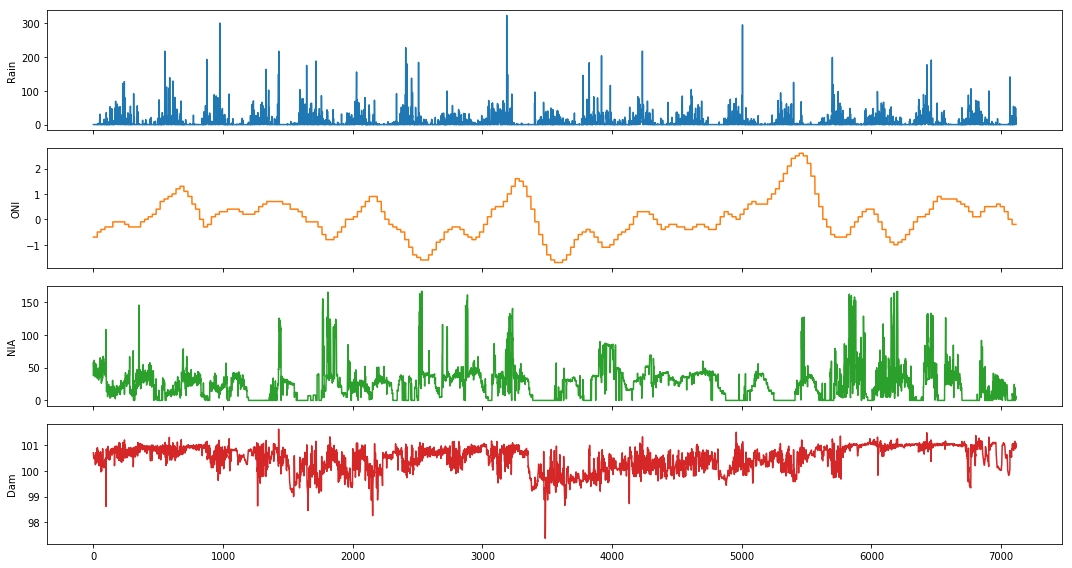

In [10]:
fig,ax = plt.subplots(4, figsize=(15,8), sharex=True)
plot_cols = ['Rain', 'ONI', 'NIA', 'Dam']
ipo_df[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

#### Causality between Rainfall and Ipo Dam Water Level

For this example, we will focus on the Rain and Dam time series.

In [11]:
data_df = ipo_df.drop(['ONI', 'NIA'], axis=1)
data_df.head()

,Rain,Dam
Time,,
0,0.0,100.70
1,0.0,100.63
2,0.0,100.56
3,0.0,100.55
4,0.0,100.48


##### Test for stationarity

We look at the lag plots to quickly check for stationarity.

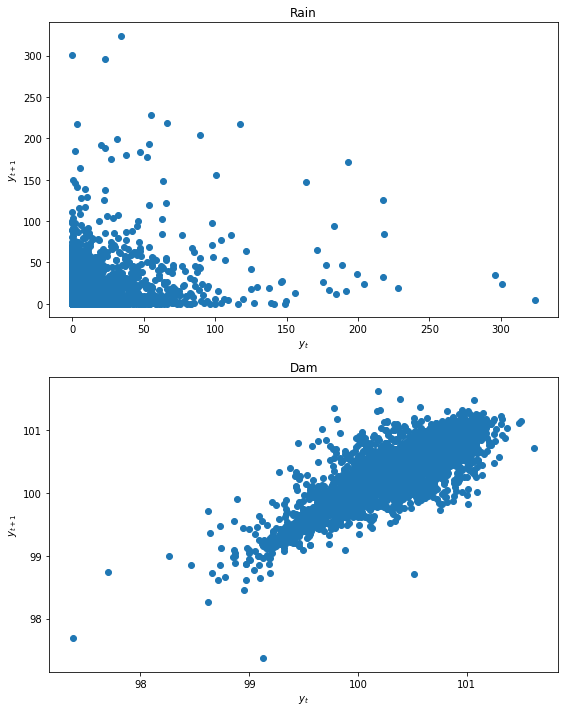

In [12]:
lag_plots(data_df)

###### Lag plot

**Result:** Dam does not look stationary. Rainfall lag plot is inconclusive.

We use KPSS and ADF tests discussed in the previous chapter to conclusively check for stationarity.

In [13]:
kpss_test(data_df)

,Rain,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.018,1.8045
p-value,0.1,0.01
result,stationary,not stationary


**Result:** Rain is stationary, while Dam is not.

In [14]:
adf_test(data_df)

,Rain,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-8.6223,-5.8742
p-value,0,0
result,stationary,stationary


**Result:** Both data are stationary.

##### Transform to stationary form

Since both the lag plot and KPSS test indicate that Dam is not stationary, we apply differencing first before building our VAR model.

In [15]:
data_df['Dam'] = data_df['Dam'] - data_df['Dam'].shift(1)
data_df = data_df.dropna()

We again look at the lag plots and apply the KPSS and ADF tests.

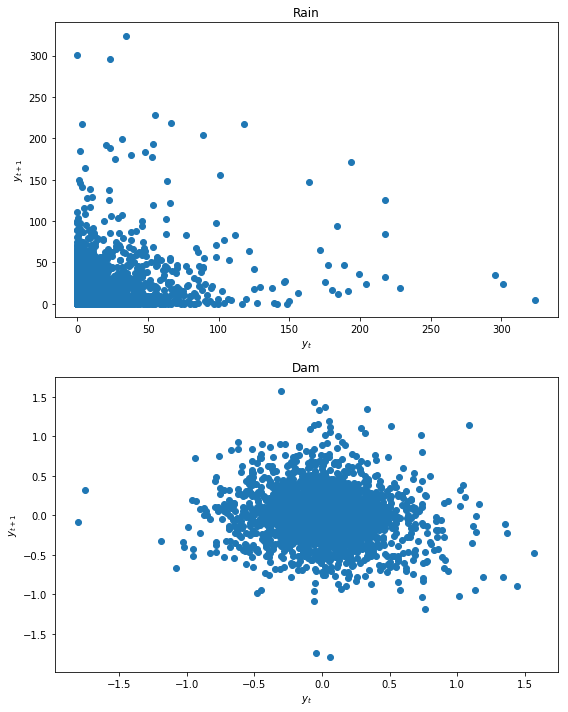

In [16]:
lag_plots(data_df)

In [17]:
kpss_test(data_df)

,Rain,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.0179,0.0047
p-value,0.1,0.1
result,stationary,stationary


In [18]:
adf_test(data_df)

,Rain,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-8.6227,-21.5919
p-value,0,0
result,stationary,stationary


**Result:** All three conclusively agree that both data are now stationary.

##### VAR Model

We next split the data into train and test sets for the VAR model.

In [19]:
train_df, test_df = splitter(data_df)

We then select the VAR order $p$ by computing the different multivariate information criteria (AIC, BIC, HQIC), and FPE.

AIC     21
BIC      8
FPE     21
HQIC    11
dtype: int64


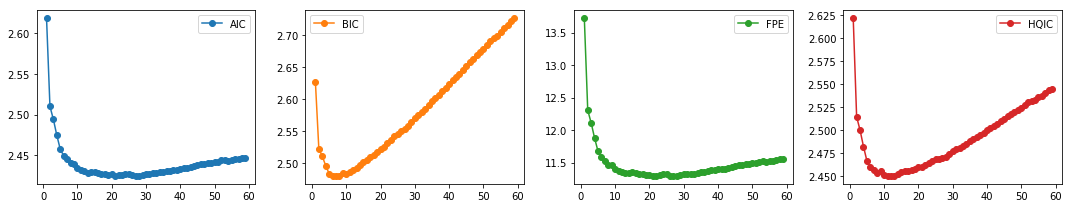

In [20]:
select_p(train_df)

**Result:** We see that BIC has the lowest value at $p=8$ while HQIC  at $p=11$. Although both AIC and FPE have the lowest value at $p=21$, their plots also show an elbow. We can thus select the number of lags to be 8 (also for computational efficiency). 

We now fit the VAR model with the chosen order.

In [21]:
p = 8
model = VAR(train_df)
var_model = model.fit(p)

##### Granger Causality Test

We can finally test the variables for Granger Causality

In [22]:
df_gmat = granger_causation_matrix(train_df, train_df.columns, p)
df_gmat

,Rain_x,Dam_x
Rain_y,1.0,0.2169
Dam_y,0.0,1.0000


**Recall:** If a given p-value is less than the significance level (for instance, $\alpha$ = 0.05), then, the corresponding X series (column) causes the Y (row).

In [23]:
granger_conclusion(df_gmat)

Rain_x Granger causes Dam_y
Dam_x does NOT Granger Rain_y


**Results:** For this particular example, we can say that rainfall Granger causes changes in the dam water level. This means that rainfall data improves changes in dam water level prediction performance.

On the other hand, changes in dam water level does not Granger cause rainfall. This means that changes in dam water level data does not improve rainfall prediction performance.

#### Causality between NIA Release Flow and Ipo Dam Water Level

In this next example, we now focus on the NIA and Dam time series.

In [24]:
data_df = ipo_df.drop(['ONI', 'Rain'], axis=1)
data_df.head()

,NIA,Dam
Time,,
0,38.225693,100.70
1,57.996530,100.63
2,49.119213,100.56
3,47.034720,100.55
4,42.223380,100.48


##### Test for stationarity

We first check for stationarity by looking at the lag plots and applying the KPSS and ADF tests.

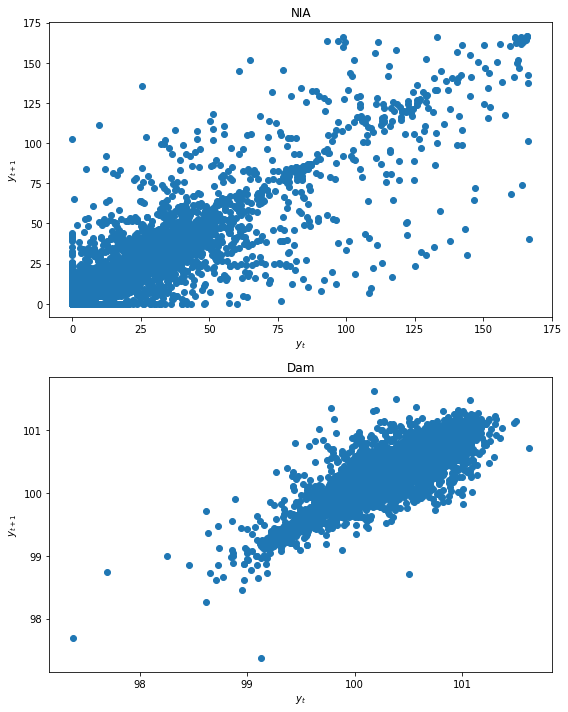

In [25]:
lag_plots(data_df)

In [26]:
kpss_test(data_df)

,NIA,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.184,1.8045
p-value,0.022,0.01
result,not stationary,not stationary


In [27]:
adf_test(data_df)

,NIA,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-6.603,-5.8742
p-value,0,0
result,stationary,stationary


**Result:** All three conclusively show that both data are not stationary.

##### Transform to stationary form

We apply differencing and recheck for stationarity.

In [28]:
data_df['NIA'] = data_df['NIA'] - data_df['NIA'].shift(1)
data_df['Dam'] = data_df['Dam'] - data_df['Dam'].shift(1)
data_df = data_df.dropna()

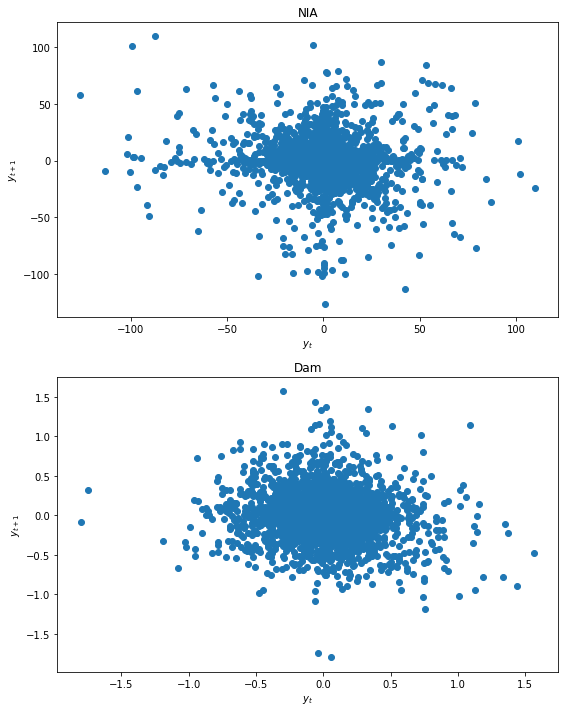

In [29]:
lag_plots(data_df)

In [30]:
kpss_test(data_df)

,NIA,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.0048,0.0047
p-value,0.1,0.1
result,stationary,stationary


In [31]:
adf_test(data_df)

,NIA,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-21.2837,-21.5919
p-value,0,0
result,stationary,stationary


**Result:** All three conclusively agree that both data are now stationary.

##### VAR Model

We next split the data and select the lag order $p$.

In [32]:
train_df, test_df = splitter(data_df)

AIC     27
BIC      8
FPE     27
HQIC    13
dtype: int64


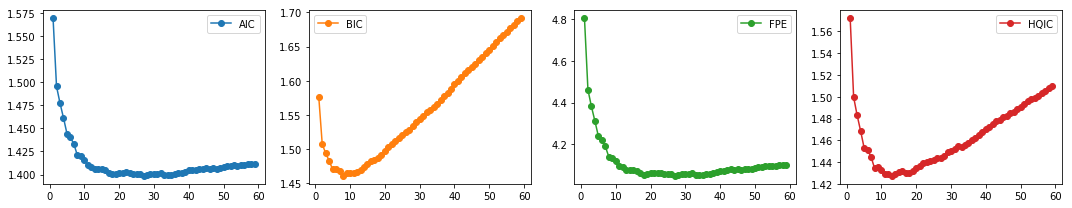

In [33]:
select_p(train_df)

We select $p=8$ with the same reasons as before. We finally fit our VAR model and test for Granger Causality.

In [34]:
p = 8
model = VAR(train_df)
var_model = model.fit(p)

##### Granger Causality Test

In [35]:
df_gmat = granger_causation_matrix(train_df, train_df.columns, p)
df_gmat

,NIA_x,Dam_x
NIA_y,1.0000,0.0007
Dam_y,0.0216,1.0000


**Recall:** If a given p-value is less than the significance level (for instance, $\alpha$ = 0.05), then, the corresponding X series (column) causes the Y (row).

In [36]:
granger_conclusion(df_gmat)

NIA_x Granger causes Dam_y
Dam_x Granger causes NIA_y


**Result:** For this particular example, we can say that changes in NIA release flow Granger causes changes in the dam water level. Conversely, changes in dam water level also Granger causes changes in the NIA release flow. This is an example of the feedback mentioned in an earlier section above. This means that NIA release flow data improves changes in dam water level prediction performance, and dam water level data also improves changes in NIA release flow prediction performance.

### Worked Example : La Mesa Dam Dataset

We now do the same steps for the La Mesa dataset.

#### Import dataset

In [37]:
PATH = '../data/'
lamesa_df = pd.read_csv(PATH + 'La Mesa_dataset.csv', index_col='Time');
lamesa_df = lamesa_df.dropna()
lamesa_df.head()

,Rain,ONI,NIA,Dam
Time,,,,
0,0.0,-0.7,38.225693,78.63
1,0.0,-0.7,57.996530,78.63
2,0.0,-0.7,49.119213,78.61
3,0.0,-0.7,47.034720,78.59
4,0.0,-0.7,42.223380,78.56


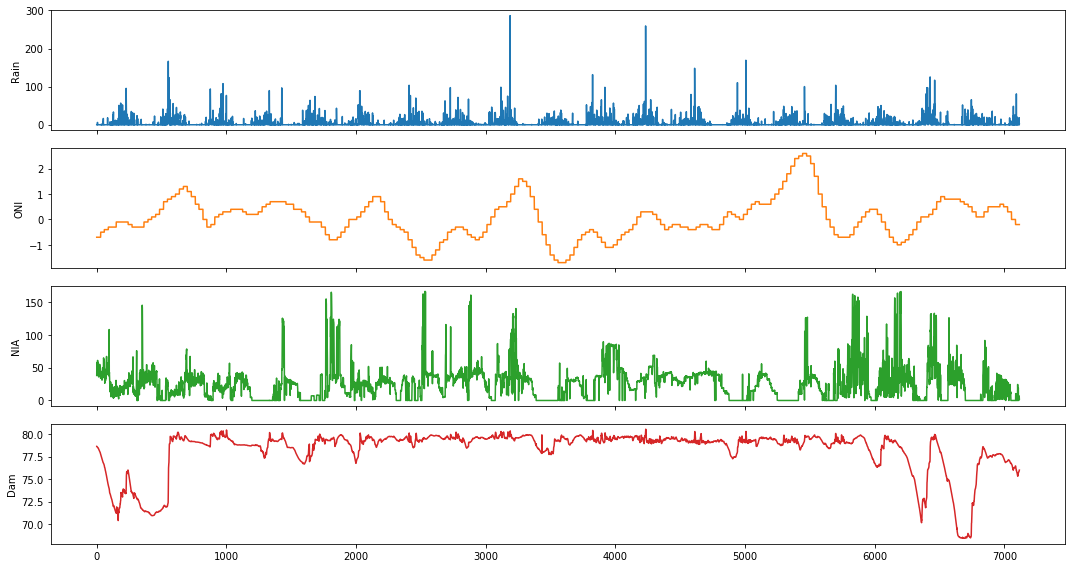

In [38]:
fig,ax = plt.subplots(4, figsize=(15,8), sharex=True)
plot_cols = ['Rain', 'ONI', 'NIA', 'Dam']
lamesa_df[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

#### Causality between Rainfall and La Mesa Dam Water Level

In this next example, we first consider the Rain and Dam time series.

In [39]:
data_df = lamesa_df.drop(['ONI', 'NIA'], axis=1)
data_df.head()

,Rain,Dam
Time,,
0,0.0,78.63
1,0.0,78.63
2,0.0,78.61
3,0.0,78.59
4,0.0,78.56


##### Test for stationarity

We first check for stationarity by looking at the lag plots and applying the KPSS and ADF tests.

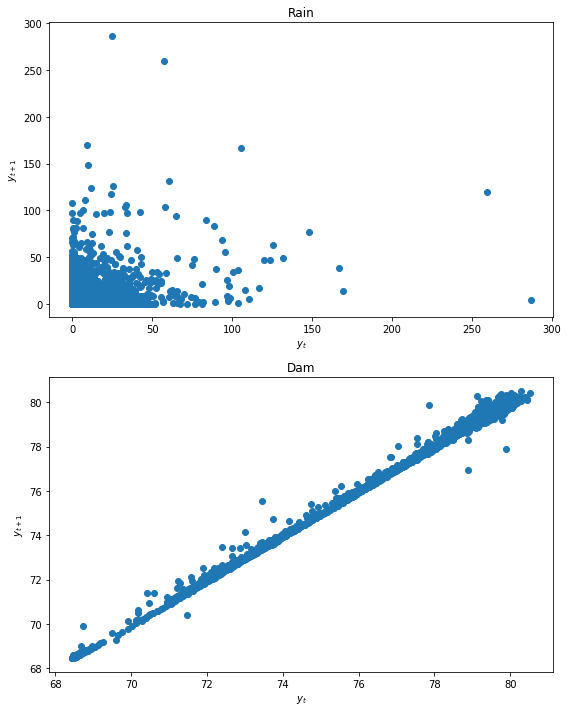

In [40]:
lag_plots(data_df)

In [41]:
kpss_test(data_df)

,Rain,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.0327,1.8845
p-value,0.1,0.01
result,stationary,not stationary


In [42]:
adf_test(data_df)

,Rain,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-8.7136,-4.2004
p-value,0,0.0007
result,stationary,stationary


**Result:** All three conclusively show that again Rain is stationary, while Dam is not.

##### Transform to stationary form

We apply differencing and recheck for stationarity.

In [43]:
data_df['Dam'] = data_df['Dam'] - data_df['Dam'].shift(1)
data_df = data_df.dropna()

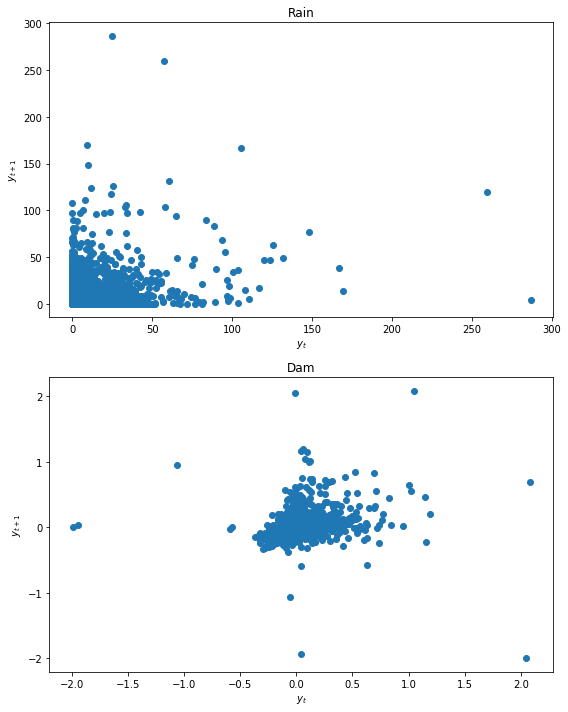

In [44]:
lag_plots(data_df)

In [45]:
kpss_test(data_df)

,Rain,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.0327,0.0226
p-value,0.1,0.1
result,stationary,stationary


In [46]:
adf_test(data_df)

,Rain,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-8.7138,-26.5948
p-value,0,0
result,stationary,stationary


**Result:** All three conclusively agree that both data are now stationary.

##### VAR Model

We next split the data and select the lag order $p$.

In [47]:
train_df, test_df = splitter(data_df)

AIC     7
BIC     6
FPE     7
HQIC    7
dtype: int64


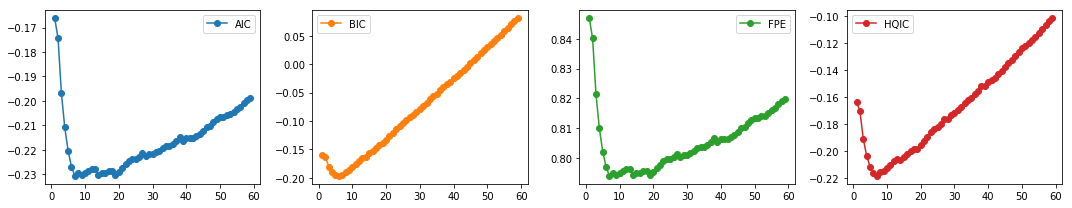

In [48]:
select_p(train_df)

We select $p=7$. We finally fit our VAR model and test for Granger Causality.

In [49]:
p = 7
model = VAR(train_df)
var_model = model.fit(p)

##### Granger Causality Test

In [50]:
df_gmat = granger_causation_matrix(train_df, train_df.columns, p)  
df_gmat

,Rain_x,Dam_x
Rain_y,1.0,0.0005
Dam_y,0.0,1.0000


**Recall:** If a given p-value is less than the significance level (for instance, $\alpha$ = 0.05), then, the corresponding X series (column) causes the Y (row).

In [51]:
granger_conclusion(df_gmat)

Rain_x Granger causes Dam_y
Dam_x Granger causes Rain_y


**Result:** For this particular example, we can say that rainfall Granger causes changes in the dam water level. Conversely, changes in dam water level also Granger causes rainfall. This is another example of feedback. This means that rainfall data improves changes in dam water level prediction performance, and dam water level data also improves rainfall prediction performance.

#### Causality between NIA Release Flow and La Mesa Dam Water Level

In this next example, we now focus on the NIA and Dam time series.

In [52]:
data_df = lamesa_df.drop(['ONI', 'Rain'], axis=1)
data_df.head()

,NIA,Dam
Time,,
0,38.225693,78.63
1,57.996530,78.63
2,49.119213,78.61
3,47.034720,78.59
4,42.223380,78.56


##### Test for stationarity

We first check for stationarity by looking at the lag plots and applying the KPSS and ADF tests.

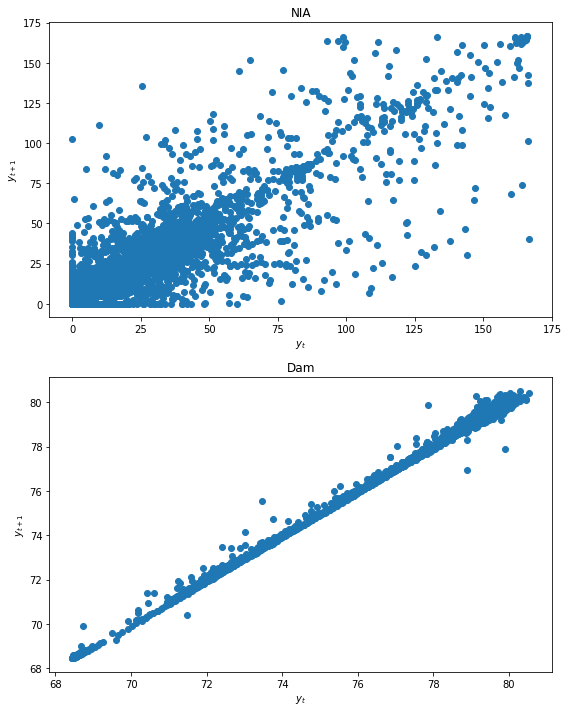

In [53]:
lag_plots(data_df)

In [54]:
kpss_test(data_df)

,NIA,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.184,1.8845
p-value,0.022,0.01
result,not stationary,not stationary


In [55]:
adf_test(data_df)

,NIA,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-6.603,-4.2004
p-value,0,0.0007
result,stationary,stationary


**Result:** All three conclusively show that both data are not stationary.

##### Transform to stationary form

We apply differencing and recheck for stationarity.

In [56]:
data_df['NIA'] = data_df['NIA'] - data_df['NIA'].shift(1)
data_df['Dam'] = data_df['Dam'] - data_df['Dam'].shift(1)
data_df = data_df.dropna()

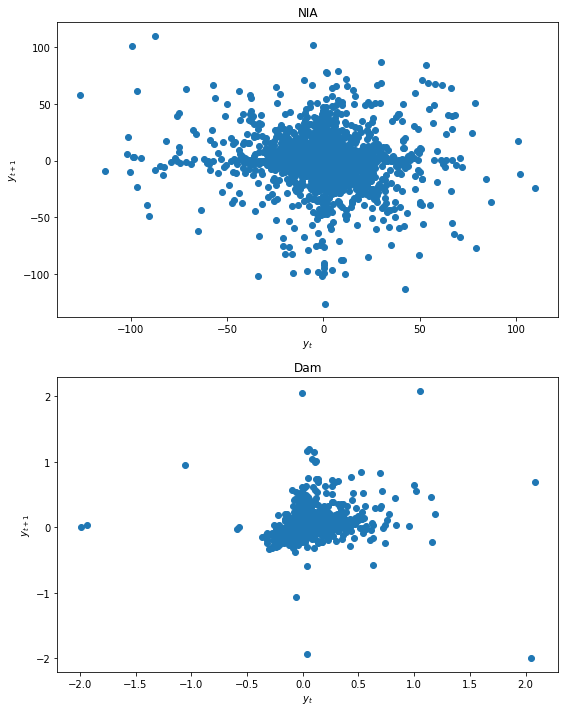

In [57]:
lag_plots(data_df)

In [58]:
kpss_test(data_df)

,NIA,Dam
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.0048,0.0226
p-value,0.1,0.1
result,stationary,stationary


In [59]:
adf_test(data_df)

,NIA,Dam
Critical value - 1%,-3.4313,-3.4313
Critical value - 10%,-2.567,-2.567
Critical value - 5%,-2.8619,-2.8619
Test statistic,-21.2837,-26.5948
p-value,0,0
result,stationary,stationary


**Result:** All three conclusively agree that both data are now stationary.

##### VAR Model

We next split the data and select the lag order $p$.

In [60]:
train_df, test_df = splitter(data_df)

AIC     14
BIC      2
FPE     14
HQIC     8
dtype: int64


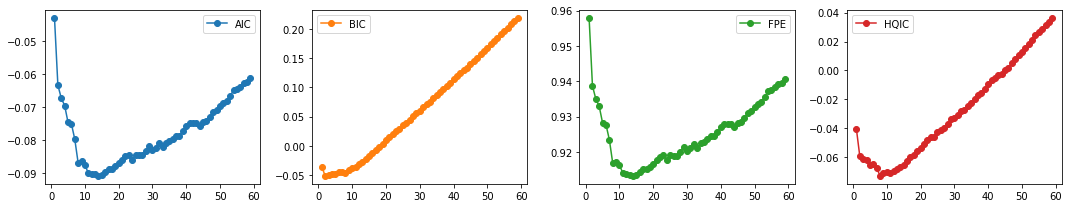

In [61]:
select_p(train_df)

We select $p=14$. We finally fit our VAR model and test for Granger Causality.

In [62]:
p = 14
model = VAR(train_df)
var_model = model.fit(p)

##### Granger Causality Test

In [63]:
df_gmat = granger_causation_matrix(train_df, train_df.columns, p)  
df_gmat

,NIA_x,Dam_x
NIA_y,1.000,0.1632
Dam_y,0.636,1.0000


**Recall:** If a given p-value is less than the significance level (for instance, $\alpha$ = 0.05), then, the corresponding X series (column) causes the Y (row).

In [64]:
granger_conclusion(df_gmat)

NIA_x does NOT Granger Dam_y
Dam_x does NOT Granger NIA_y


**Result:** We see that, unlike for Ipo Dam, changes in NIA release flow and changes in the dam water level do NOT Granger cause one another for La Mesa Dam. This means that NIA release flow data does NOT improve changes in dam water level prediction performance, and dam water level data also does NOT improve changes in NIA release flow prediction performance.

### Worked Example : Jena Climate Dataset

Let us consider the Jena climate dataset and explore which variables are Granger causal to another.

#### Import dataset

In [65]:
PATH = '../data/'

train_df = pd.read_csv(PATH + 'train_series_datetime.csv',index_col=0).set_index('Date Time')
val_df = pd.read_csv(PATH + 'val_series_datetime.csv',index_col=0).set_index('Date Time')
test_df = pd.read_csv(PATH + 'test_series_datetime.csv',index_col=0).set_index('Date Time')
train_df.index = pd.to_datetime(train_df.index)
val_df.index = pd.to_datetime(val_df.index)
test_df.index = pd.to_datetime(test_df.index)

train_val_df = pd.concat([train_df, val_df])
jena_df = pd.concat([train_df, val_df, test_df])
jena_df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 02:10:00,996.63,-8.85,264.57,-9.70,93.5,3.12,2.92,0.20,1.82,2.93,1312.11,0.16,0.50,158.3
2009-01-01 03:10:00,996.87,-8.84,264.56,-9.69,93.5,3.13,2.92,0.20,1.83,2.93,1312.37,0.07,0.25,129.3
2009-01-01 04:10:00,997.05,-9.23,264.15,-10.25,92.2,3.03,2.79,0.24,1.74,2.80,1314.62,0.10,0.38,203.9


In [66]:
jena_df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

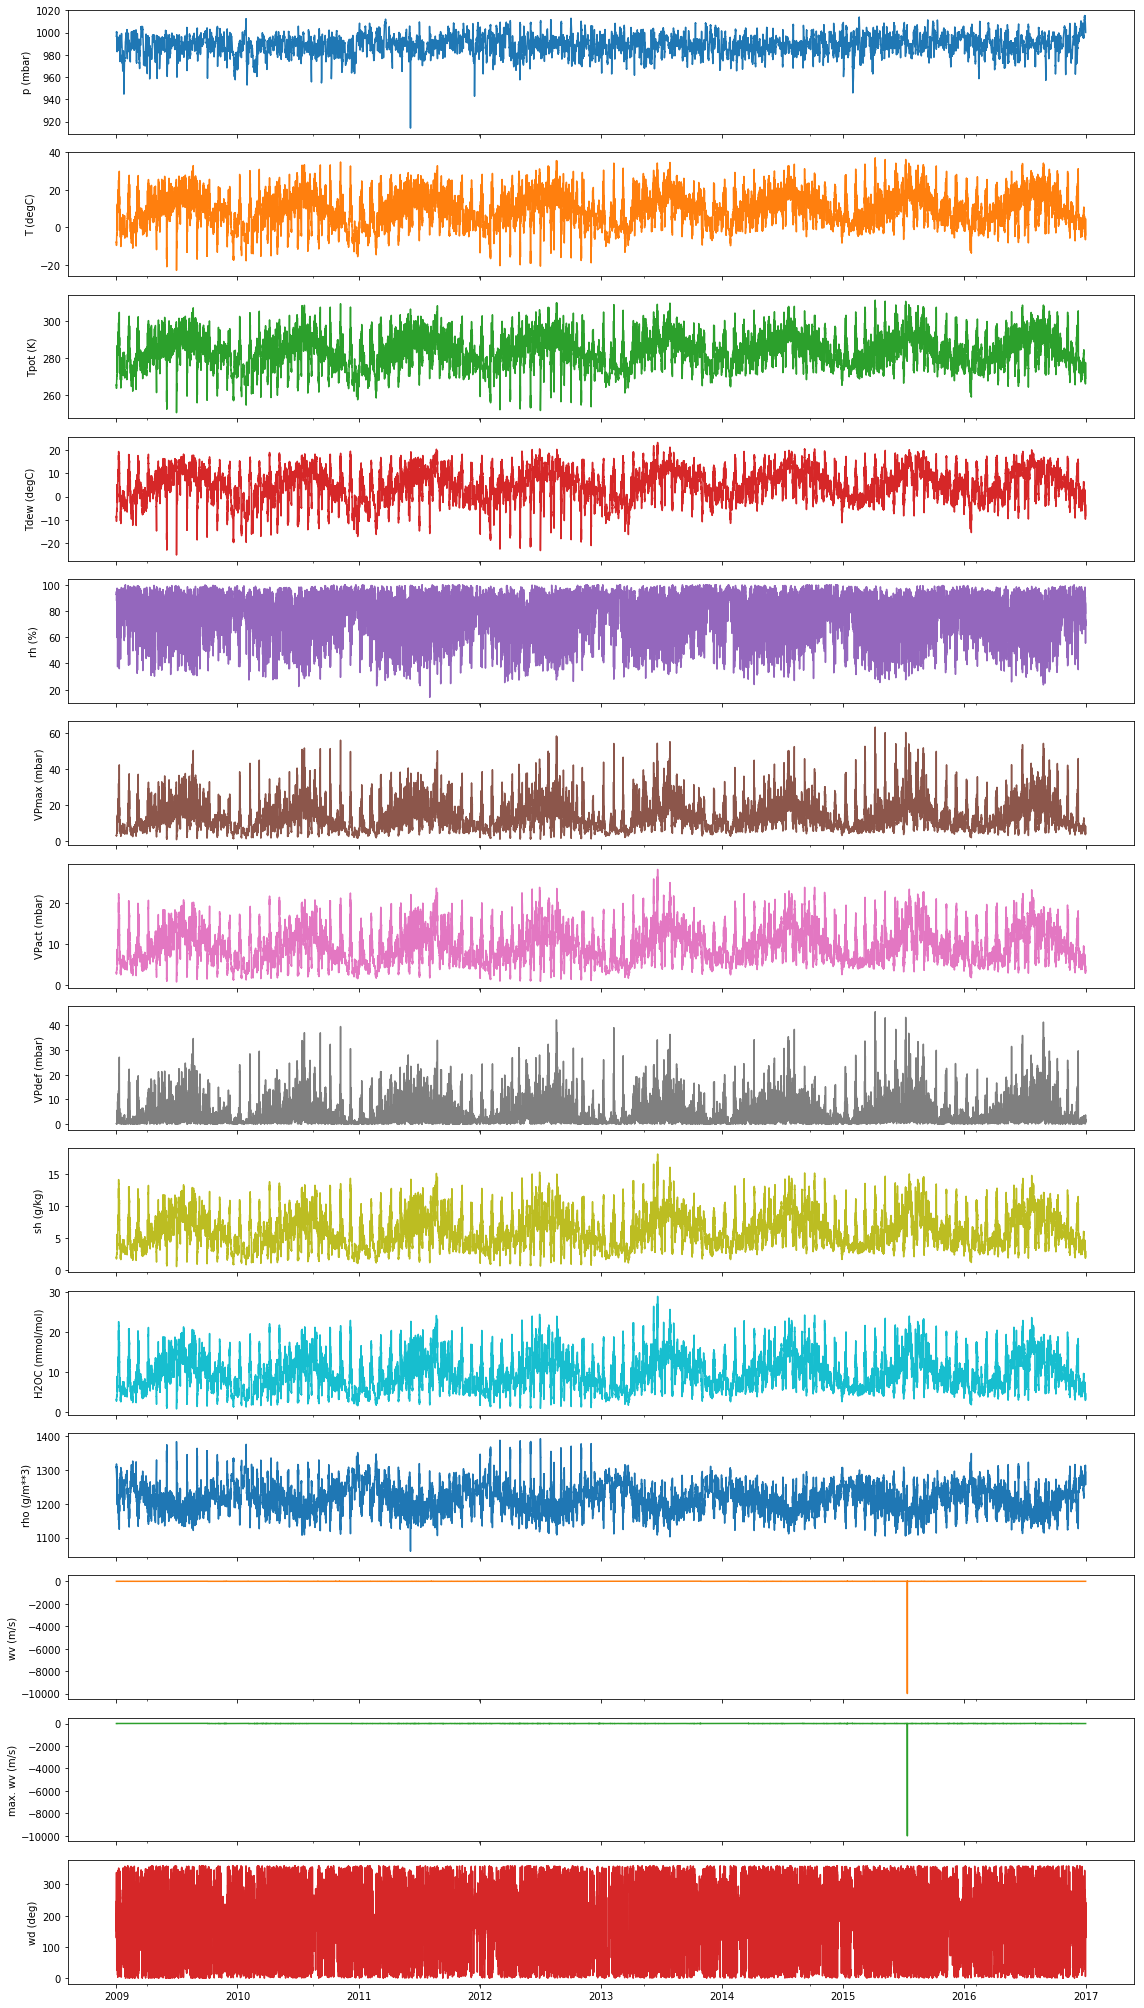

In [67]:
features = jena_df.columns

fig,ax = plt.subplots(len(features), figsize=(16,len(features)*2), sharex=True)
plot_cols = features
jena_df[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

In [68]:
sel_cols = ['p (mbar)', 'T (degC)', 'H2OC (mmol/mol)']
data_df = jena_df[sel_cols]
data_df.head()

,p (mbar),T (degC),H2OC (mmol/mol)
Date Time,,,
2009-01-01 00:10:00,996.52,-8.02,3.12
2009-01-01 01:10:00,996.50,-7.62,3.27
2009-01-01 02:10:00,996.63,-8.85,2.93
2009-01-01 03:10:00,996.87,-8.84,2.93
2009-01-01 04:10:00,997.05,-9.23,2.80


#### Test for stationarity

**We look at the lag plots to quickly check for stationarity.** We can see below that the lag plots for all variables are **not stationary**.

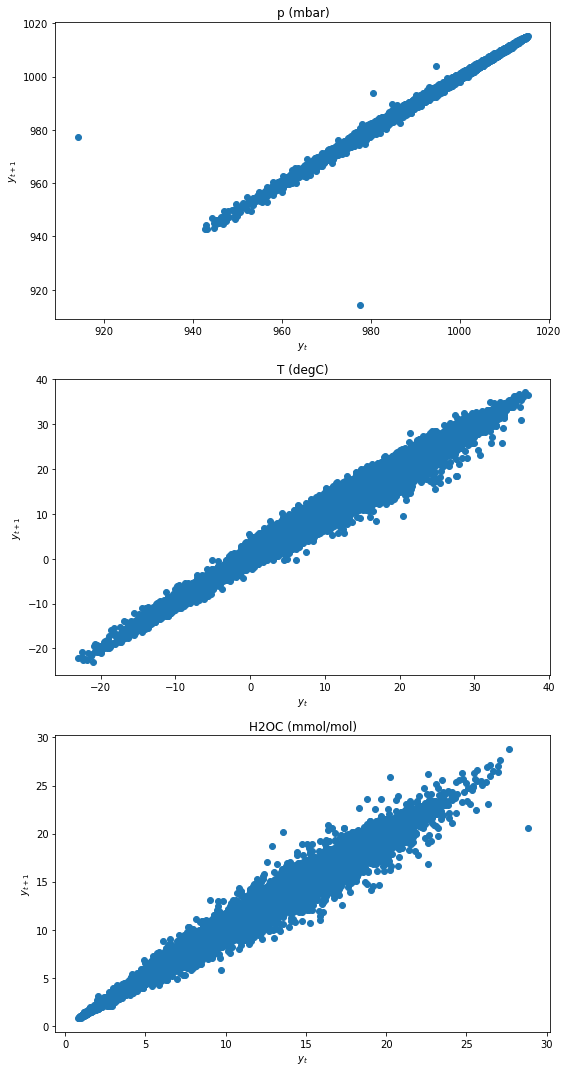

In [69]:
lag_plots(data_df)

**We use KPSS and ADF tests discussed in the previous chapter to conclusively check for stationarity.** 

Looking at the summary table of results below, at level of significance $\alpha = 0.05$ comparing the test statistics, all variables are **not stationary**. 

In [70]:
kpss_test(data_df)

,p (mbar),T (degC),H2OC (mmol/mol)
Critical value - 1%,0.216,0.216,0.216
Critical value - 10%,0.119,0.119,0.119
Critical value - 2.5%,0.176,0.176,0.176
Critical value - 5%,0.146,0.146,0.146
Test statistic,0.2295,0.3649,0.3592
p-value,0.01,0.01,0.01
result,not stationary,not stationary,not stationary


In [71]:
adf_test(data_df)

,p (mbar),T (degC),H2OC (mmol/mol)
Critical value - 1%,-3.4304,-3.4304,-3.4304
Critical value - 10%,-2.5668,-2.5668,-2.5668
Critical value - 5%,-2.8616,-2.8616,-2.8616
Test statistic,-18.3281,-8.5824,-9.823
p-value,0,0,0
result,stationary,stationary,stationary


#### Transform to stationary form

Since both the lag plot and KPSS test indicate that the `p (mbar)`, `T (degC)` and `H2OC (mmol/mol)` are **not stationary**, we apply differencing first before building our VAR model.

In [72]:
for f in sel_cols:
    data_df[f] = data_df[f] - data_df[f].shift(1)

data_df = data_df.dropna()
data_df.head()

,p (mbar),T (degC),H2OC (mmol/mol)
Date Time,,,
2009-01-01 01:10:00,-0.02,0.40,0.15
2009-01-01 02:10:00,0.13,-1.23,-0.34
2009-01-01 03:10:00,0.24,0.01,0.00
2009-01-01 04:10:00,0.18,-0.39,-0.13
2009-01-01 05:10:00,0.38,-0.44,-0.08


**Result:** If we review all tests below, all of them conclusively agree that both variables are now stationary.

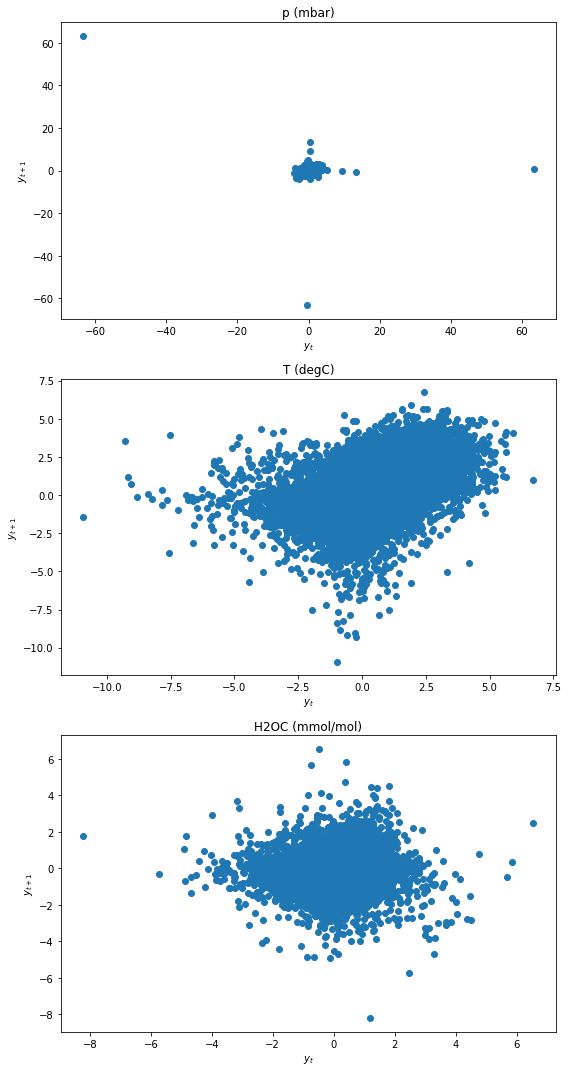

In [73]:
lag_plots(data_df)

In [74]:
kpss_test(data_df)

,p (mbar),T (degC),H2OC (mmol/mol)
Critical value - 1%,0.216,0.216,0.216
Critical value - 10%,0.119,0.119,0.119
Critical value - 2.5%,0.176,0.176,0.176
Critical value - 5%,0.146,0.146,0.146
Test statistic,0.0009,0.0024,0.0027
p-value,0.1,0.1,0.1
result,stationary,stationary,stationary


In [75]:
adf_test(data_df)

,p (mbar),T (degC),H2OC (mmol/mol)
Critical value - 1%,-3.4304,-3.4304,-3.4304
Critical value - 10%,-2.5668,-2.5668,-2.5668
Critical value - 5%,-2.8616,-2.8616,-2.8616
Test statistic,-38.6219,-41.3374,-42.0532
p-value,0,0,0
result,stationary,stationary,stationary


#### VAR Model

We next split the data into train and test sets for the VAR model.

In [76]:
train_df, test_df = splitter(data_df)

We then select the VAR order $p$ by computing the different multivariate information criteria (AIC, BIC, HQIC), and FPE.

**Result:** We see that BIC has the lowest value at $p=53$ while HQIC  at $p=54$. Although both AIC and FPE have the lowest value at $p=59$. For this can, we will select the number of lags to be around 23 (also for computational efficiency). 

AIC     59
BIC     53
FPE     59
HQIC    54
dtype: int64


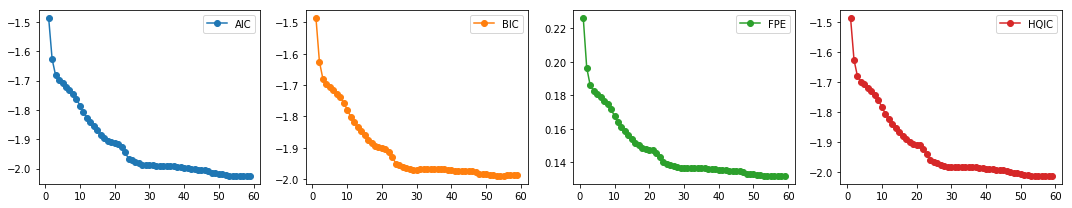

In [77]:
sel_cols_p = ['p (mbar)', 'T (degC)']
select_p(train_df[sel_cols_p])

AIC     59
BIC     53
FPE     59
HQIC    54
dtype: int64


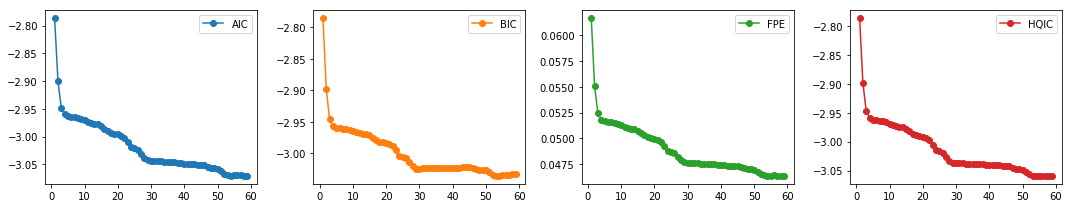

In [78]:
sel_cols_p = ['p (mbar)', 'H2OC (mmol/mol)']
select_p(train_df[sel_cols_p])

We select $p=23$. We finally fit our VAR model and test for Granger Causality.

In [79]:
p = 23
model = VAR(train_df)
var_model = model.fit(p)

#### Granger Causality Test

**Recall:** If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

**Results**: For this particular example, we can say that **changes in `pressure` Granger causes changes in `water vapor concentration`**. Conversely, changes in `water vapor concentration` also Granger causes `pressure`. **This is an example of feedback.** This means that `pressure` data improves changes in `water vapor concentration` prediction performance, and `water vapor concentration` data also improves `pressure` prediction performance.

In [80]:
sel_cols_p = ['p (mbar)', 'T (degC)']
df_gmat = granger_causation_matrix(train_df[sel_cols_p], train_df[sel_cols_p].columns, p)  
df_gmat

,p (mbar)_x,T (degC)_x
p (mbar)_y,1.0,0.0
T (degC)_y,0.0,1.0


In [81]:
granger_conclusion(df_gmat)

p (mbar)_x Granger causes T (degC)_y
T (degC)_x Granger causes p (mbar)_y


In [82]:
sel_cols_p = ['p (mbar)', 'H2OC (mmol/mol)']
df_gmat = granger_causation_matrix(train_df[sel_cols_p], train_df[sel_cols_p].columns, p)  
df_gmat

,p (mbar)_x,H2OC (mmol/mol)_x
p (mbar)_y,1.0,0.0
H2OC (mmol/mol)_y,0.0,1.0


In [83]:
granger_conclusion(df_gmat)

p (mbar)_x Granger causes H2OC (mmol/mol)_y
H2OC (mmol/mol)_x Granger causes p (mbar)_y


### Worked Example : M5 forecasting challenge dataset - Walmart products sales
https://www.kaggle.com/c/m5-forecasting-accuracy/overview/description

#### Import dataset

In [84]:
# from folder
PATH = '../data/m5/processed/'
df_m5 = pd.read_csv(PATH + "m5_foods_1_218_ca1.csv", index_col="Week Number")

# from google drive
# url='https://drive.google.com/file/d/1A6x2NsXCsDNIBogdEG7tCgJtzwBssmLQ/view?usp=sharing'
# file_id=url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?id=' + file_id
# df_m5 = pd.read_csv(dwn_url, index_col="Week Number")

df_m5.head()

,FOODS_1_161,FOODS_1_218
Week Number,,
1,4,10
2,0,3
3,0,4
4,0,0
5,0,0


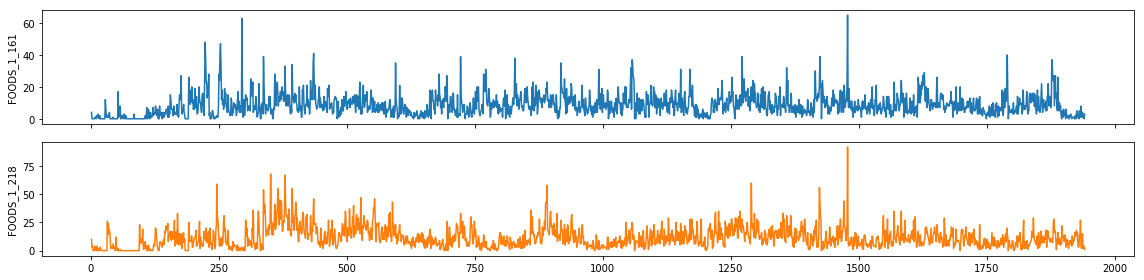

In [85]:
features = df_m5.columns

fig,ax = plt.subplots(len(features), figsize=(16,len(features)*2), sharex=True)
plot_cols = features
df_m5[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

#### Test for stationarity

**We look at the lag plots to quickly check for stationarity.** We can see below that the lag plots for both food products are inconclusive.

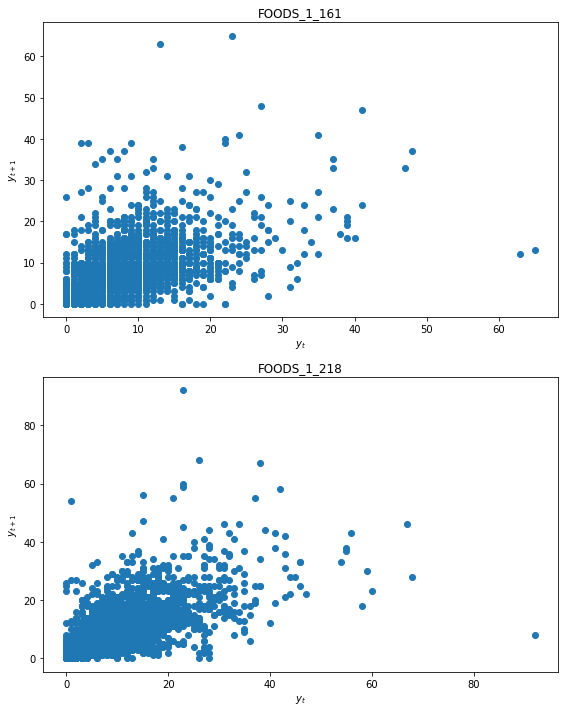

In [86]:
lag_plots(df_m5)

**We use KPSS and ADF tests discussed in the previous chapter to conclusively check for stationarity.** 

Looking at the summary table of results below, at level of significance $\alpha = 0.05$ comparing the test statistics, both products are **not stationary**. 

In [87]:
kpss_test(df_m5)

,FOODS_1_161,FOODS_1_218
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.2924,0.2406
p-value,0.01,0.01
result,not stationary,not stationary


Looking at the summary table of results below, at level of significance $\alpha = 0.05$ comparing the test statistics, both products are **stationary**. 

In [88]:
adf_test(df_m5)

,FOODS_1_161,FOODS_1_218
Critical value - 1%,-3.4338,-3.4338
Critical value - 10%,-2.5676,-2.5676
Critical value - 5%,-2.863,-2.863
Test statistic,-6.2924,-4.5973
p-value,0,0.0001
result,stationary,stationary


#### Transform to stationary form

Since both the lag plot and KPSS test indicate that both `FOODS_1_161` and `FOODS_1_218` are **not stationary**, we apply differencing first before building our VAR model.

In [89]:
f = 'FOODS_1_161'
df_m5[f] = df_m5[f] - df_m5[f].shift(1)

f = 'FOODS_1_218'
df_m5[f] = df_m5[f] - df_m5[f].shift(1)

df_m5 = df_m5.dropna()
df_m5.head()

,FOODS_1_161,FOODS_1_218
Week Number,,
2,-4.0,-7.0
3,0.0,1.0
4,0.0,-4.0
5,0.0,0.0
6,0.0,0.0


**Result:** If we review all tests below, all of them conclusively agree that both food products quanity sales are now stationary.

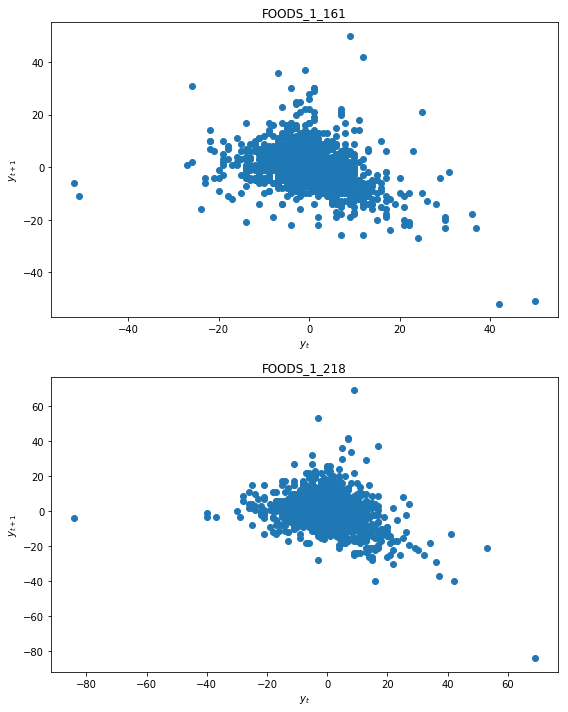

In [90]:
lag_plots(df_m5)

In [91]:
kpss_test(df_m5)

,FOODS_1_161,FOODS_1_218
Critical value - 1%,0.216,0.216
Critical value - 10%,0.119,0.119
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Test statistic,0.0079,0.0098
p-value,0.1,0.1
result,stationary,stationary


In [92]:
adf_test(df_m5)

,FOODS_1_161,FOODS_1_218
Critical value - 1%,-3.4338,-3.4338
Critical value - 10%,-2.5676,-2.5676
Critical value - 5%,-2.8631,-2.8631
Test statistic,-13.9897,-12.5158
p-value,0,0
result,stationary,stationary


#### VAR Model

We next split the data into train and test sets for the VAR model.

In [93]:
train_df, test_df = splitter(df_m5)

We then select the VAR order $p$ by computing the different multivariate information criteria (AIC, BIC, HQIC), and FPE.

**Result:** We see that BIC has the lowest value at $p=6$ while HQIC  at $p=13$. Although both AIC and FPE have the lowest value at $p=20$, their plots also show an elbow. We can thus select the number of lags to be 6 (also for computational efficiency). 

AIC     19
BIC      6
FPE     19
HQIC    13
dtype: int64


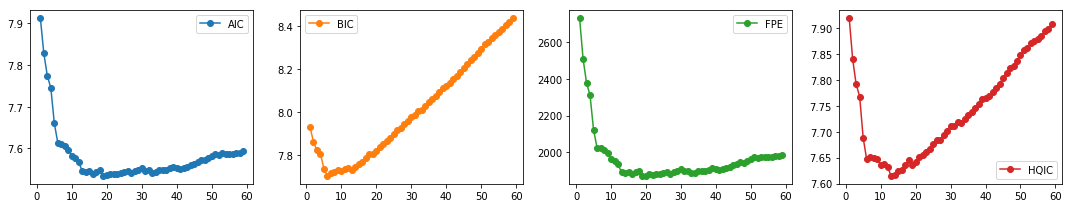

In [94]:
select_p(train_df)

We now fit the VAR model with the chosen order.

In [95]:
p = 6
model = VAR(train_df)
var_model = model.fit(p)

#### Granger Causality Test

**Recall:** If a given p-value is less than the significance level (0.05), then, the corresponding X series (column) causes the Y (row).

**Results**: For this particular example, we can say that the **`FOODS_1_161` sales Granger causes changes on `FOODS_1_218` sales**. This means that `FOODS_1_161` data improves changes `FOODS_1_218` prediction performance.

On the other hand, **changes in `FOODS_1_218` sales Granger causes changes on `FOODS_1_161` sales**. This means that `FOODS_1_218` data improves changes `FOODS_1_161` prediction performance.

In [96]:
df_gmat = granger_causation_matrix(train_df, train_df.columns, p)  
df_gmat

,FOODS_1_161_x,FOODS_1_218_x
FOODS_1_161_y,1.0000,0.0082
FOODS_1_218_y,0.0208,1.0000


In [97]:
granger_conclusion(df_gmat)

FOODS_1_161_x Granger causes FOODS_1_218_y
FOODS_1_218_x Granger causes FOODS_1_161_y


### Worked Example : Covid Mobility dataset

#### Import dataset

In [98]:
PATH = '../data/'

locations = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential']

df_covid = pd.read_csv(PATH + "Covid_Mobility_data.csv", usecols=["date", "Covid cases"]+locations, parse_dates=['date'])
df_covid['date'] = pd.to_datetime(df_covid['date']).dt.strftime('%Y-%d-%m')
df_covid.head()

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
0,2021-01-02,-43,-15,-13,-53,-32,19,1195
1,2021-01-03,-46,-21,-16,-47,-10,16,1110
2,2021-01-04,-33,-3,-9,-46,-29,20,1919
3,2021-01-05,-34,-4,-10,-45,-32,20,2222
4,2021-01-06,-35,-4,-11,-47,-31,21,2423


In [99]:
# Get absolute value
for l in locations:
    df_covid[l] = df_covid[l].abs()

df_covid.head()

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
0,2021-01-02,43,15,13,53,32,19,1195
1,2021-01-03,46,21,16,47,10,16,1110
2,2021-01-04,33,3,9,46,29,20,1919
3,2021-01-05,34,4,10,45,32,20,2222
4,2021-01-06,35,4,11,47,31,21,2423


In [100]:
df_covid.tail()

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
340,2021-12-08,10,51,30,27,41,20,242
341,2021-12-09,2,44,15,24,14,16,308
342,2021-12-10,4,48,12,24,10,17,301
343,2021-12-11,10,52,19,11,8,11,182
344,2021-12-12,12,55,29,4,20,8,163


In [101]:
features = locations + ['Covid cases']
data_df = df_covid[features]

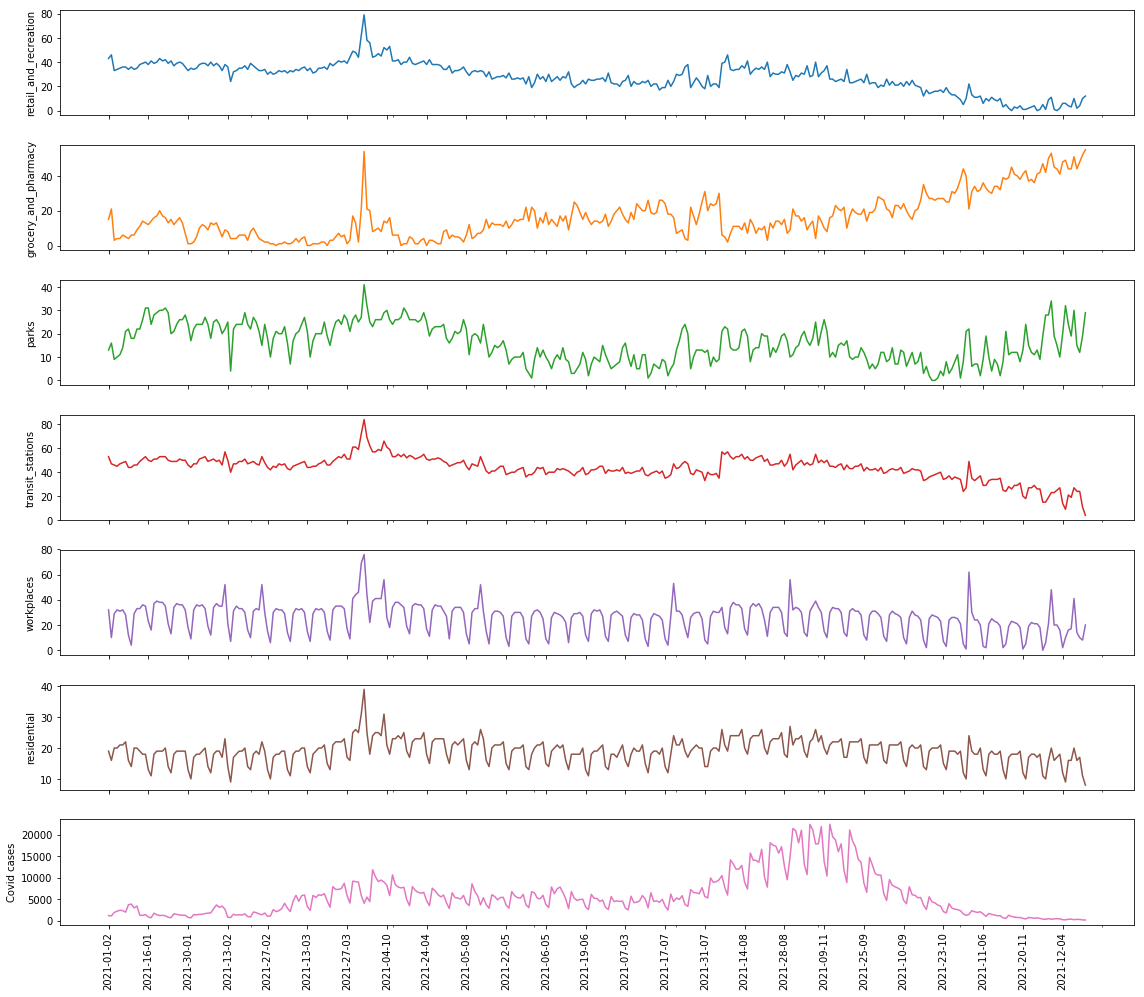

In [102]:
fig,ax = plt.subplots(len(features), figsize=(16,len(features)*2), sharex=True)
plot_cols = features
df_covid[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
k = 14
plt.xticks(range(len(df_covid["date"]))[::k], df_covid["date"][::k], rotation=90);
plt.tight_layout()
plt.show()

#### Test for stationarity

**We look at the lag plots to quickly check for stationarity.** We can see below that the lag plots for all variables are not stationary.

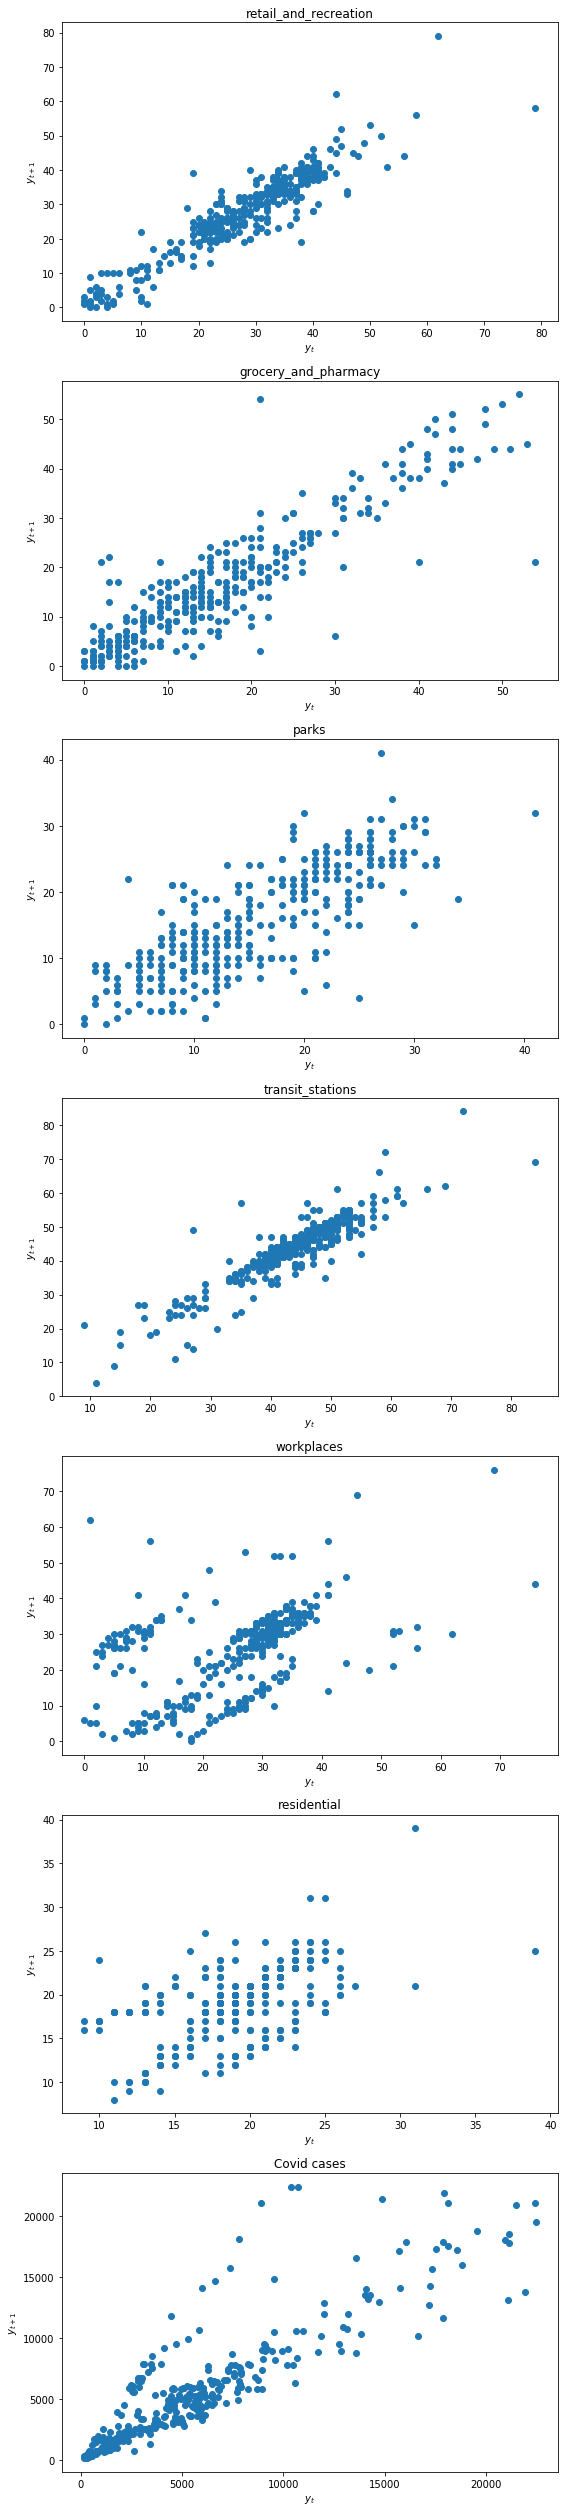

In [103]:
lag_plots(data_df)

**We use KPSS and ADF tests discussed in the previous chapter to conclusively check for stationarity.** 

Looking at the summary table of results below, at level of significance $\alpha = 0.05$ comparing the test statistics, all variables are **not stationary**. 

In [104]:
kpss_test(data_df)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
Critical value - 1%,0.216,0.216,0.216,0.216,0.216,0.216,0.216
Critical value - 10%,0.119,0.119,0.119,0.119,0.119,0.119,0.119
Critical value - 2.5%,0.176,0.176,0.176,0.176,0.176,0.176,0.176
Critical value - 5%,0.146,0.146,0.146,0.146,0.146,0.146,0.146
Test statistic,0.1638,0.2626,0.1613,0.1817,0.0961,0.1817,0.2145
p-value,0.0352,0.01,0.0373,0.0229,0.1,0.0229,0.0106
result,not stationary,not stationary,not stationary,not stationary,stationary,not stationary,not stationary


In [105]:
adf_test(data_df)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
Critical value - 1%,-3.4503,-3.4503,-3.4503,-3.4503,-3.4504,-3.4504,-3.4504
Critical value - 10%,-2.5715,-2.5714,-2.5715,-2.5715,-2.5715,-2.5715,-2.5715
Critical value - 5%,-2.8703,-2.8703,-2.8703,-2.8703,-2.8704,-2.8704,-2.8704
Test statistic,-0.7872,0.9006,-1.7699,0.2016,-2.4062,-1.8923,-2.576
p-value,0.8228,0.9931,0.3955,0.9723,0.14,0.3357,0.0981
result,not stationary,not stationary,not stationary,not stationary,not stationary,not stationary,not stationary


#### Transform to stationary form

Since both the lag plot, KPSS and ADF tests indicate that the selected variables are **not stationary**, we apply differencing first before building our VAR model. For the case of `Covid cases` count, we will first perform a log transformation to remove non-linearity. You will observe that non-stationarity retains even after differencing.

In [106]:
data_df['Covid cases'] = np.log(data_df['Covid cases'])

In [107]:
for f in features:
    data_df[f] = data_df[f] - data_df[f].shift(1)

data_df = data_df.dropna()
data_df.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
1,3.0,6.0,3.0,-6.0,-22.0,-3.0,-0.073786
2,-13.0,-18.0,-7.0,-1.0,19.0,4.0,0.547444
3,1.0,1.0,1.0,-1.0,3.0,0.0,0.146603
4,1.0,0.0,1.0,2.0,-1.0,1.0,0.086599
5,1.0,2.0,3.0,1.0,1.0,0.0,-0.027617


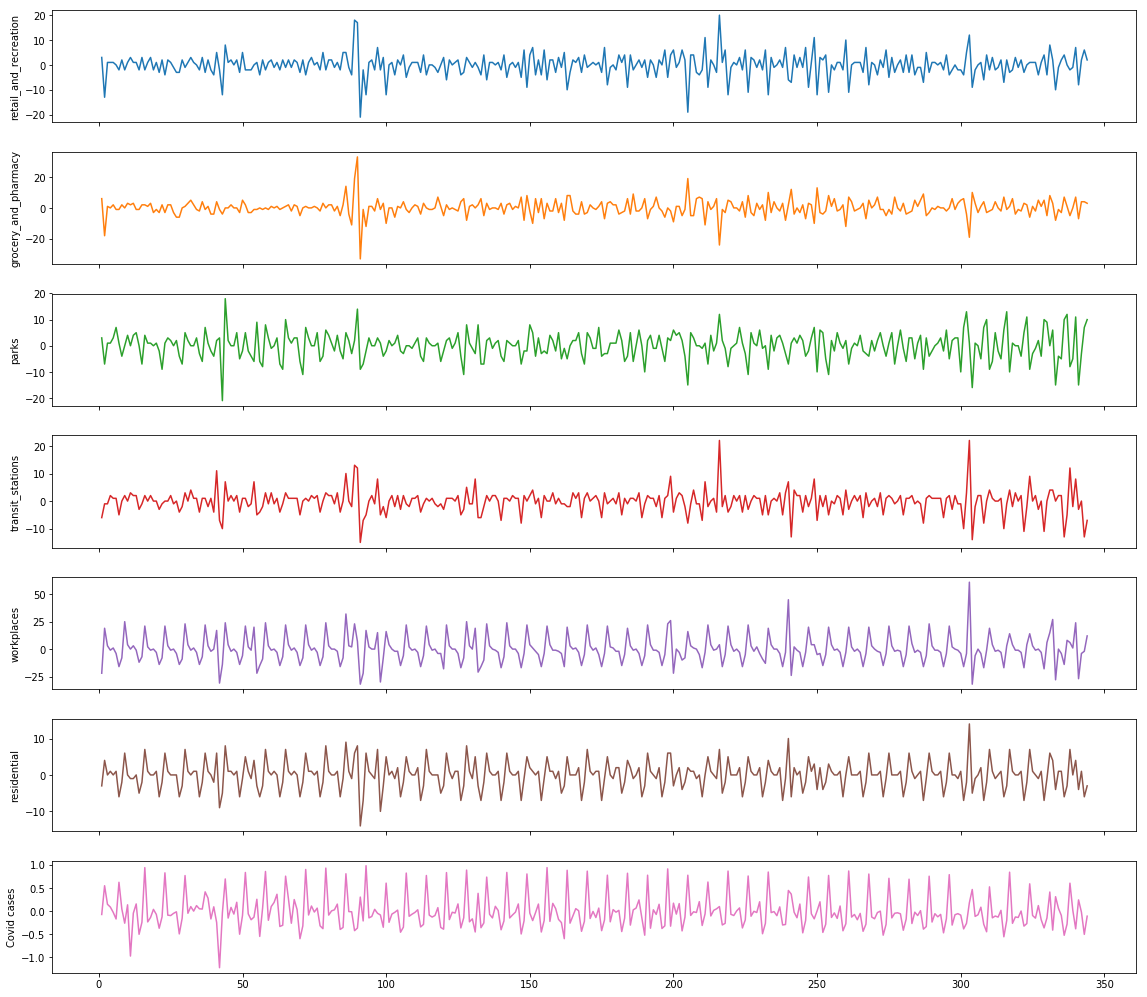

In [108]:
fig,ax = plt.subplots(len(features), figsize=(16,len(features)*2), sharex=True)
plot_cols = features
data_df[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

**Result:** If we review all tests below, all of them conclusively agree that both variables are now stationary.

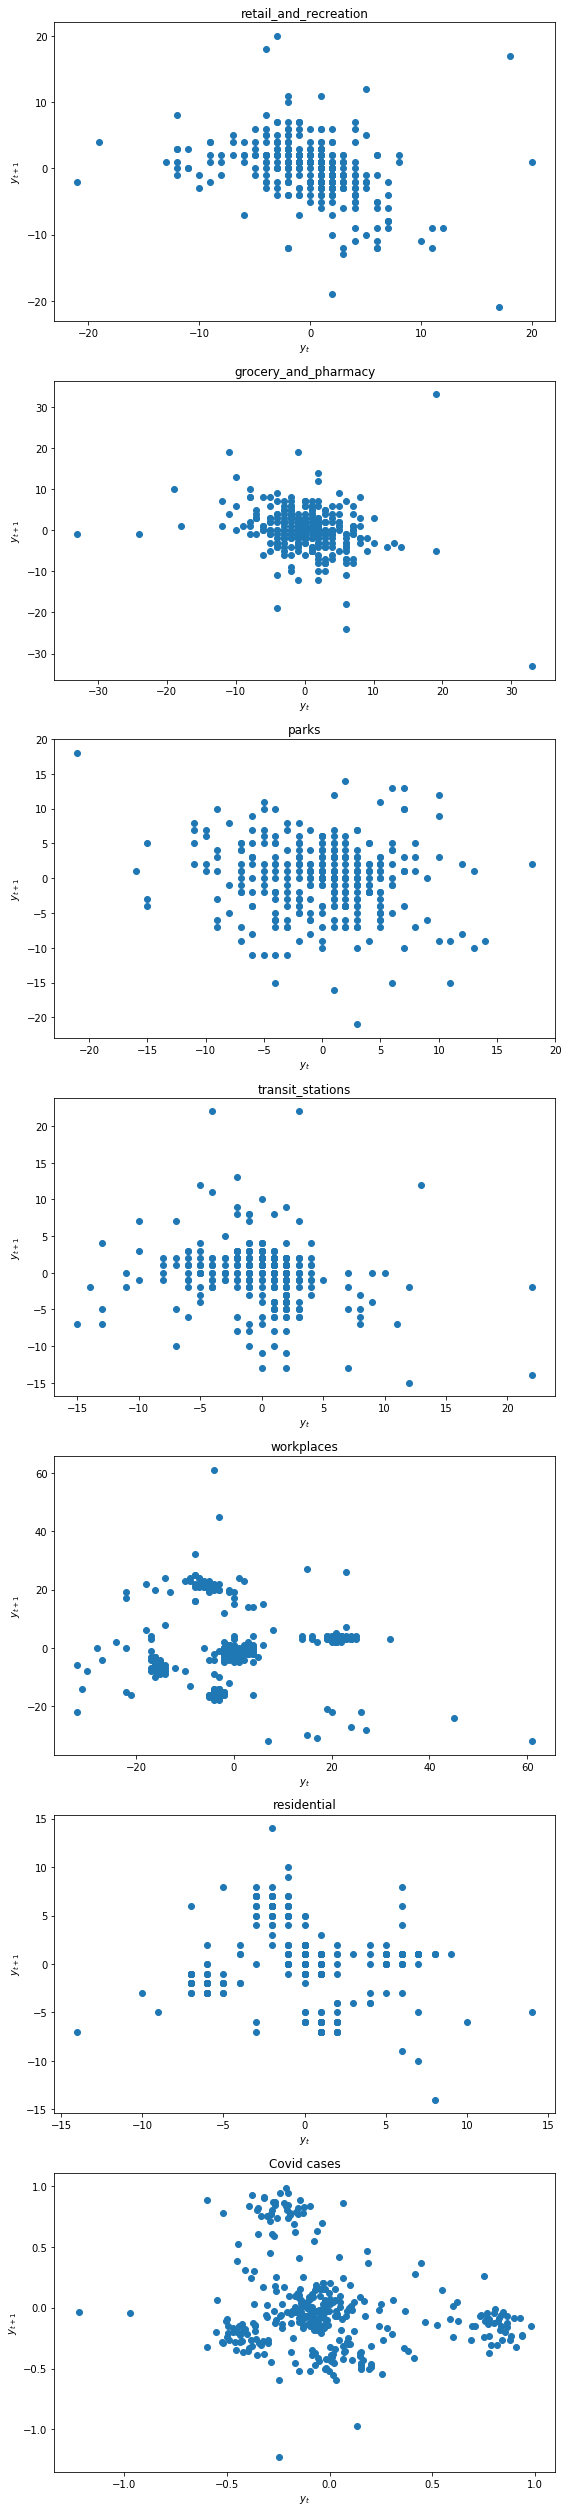

In [109]:
lag_plots(data_df)

In [110]:
kpss_test(data_df)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
Critical value - 1%,0.216,0.216,0.216,0.216,0.216,0.216,0.216
Critical value - 10%,0.119,0.119,0.119,0.119,0.119,0.119,0.119
Critical value - 2.5%,0.176,0.176,0.176,0.176,0.176,0.176,0.176
Critical value - 5%,0.146,0.146,0.146,0.146,0.146,0.146,0.146
Test statistic,0.0426,0.0447,0.0771,0.0911,0.0204,0.04,0.0996
p-value,0.1,0.1,0.1,0.1,0.1,0.1,0.1
result,stationary,stationary,stationary,stationary,stationary,stationary,stationary


In [111]:
adf_test(data_df)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Covid cases
Critical value - 1%,-3.4503,-3.4503,-3.4503,-3.4503,-3.4503,-3.4503,-3.4504
Critical value - 10%,-2.5715,-2.5714,-2.5715,-2.5715,-2.5715,-2.5715,-2.5715
Critical value - 5%,-2.8703,-2.8703,-2.8703,-2.8703,-2.8703,-2.8703,-2.8704
Test statistic,-5.8887,-7.996,-6.5346,-5.521,-6.6949,-6.0555,-3.4215
p-value,0,0,0,0,0,0,0.0102
result,stationary,stationary,stationary,stationary,stationary,stationary,stationary


#### VAR Model

We next split the data into train and test sets for the VAR model.

In [112]:
train_df, test_df = splitter(data_df)

We then select the VAR order $p$ by computing the different multivariate information criteria (AIC, BIC, HQIC), and FPE.

**Result:** We see that BIC has the lowest value at $p=6$ while HQIC  at $p=13$. Although both AIC and FPE have the lowest value at $p=20$, their plots also show an elbow. We can thus select the number of lags to be 6 (also for computational efficiency). 

AIC     44
BIC      7
FPE     44
HQIC    16
dtype: int64


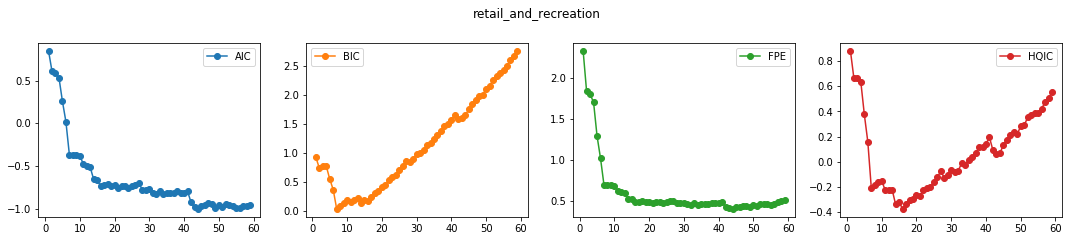

In [113]:
f = 'retail_and_recreation'
sel_cols_p = [f, 'Covid cases']
select_p(train_df[sel_cols_p])
plt.suptitle(f,y=1.1);

We select $p=30$. We finally fit our VAR model and test for Granger Causality.

AIC     44
BIC      7
FPE     44
HQIC    16
dtype: int64
AIC     58
BIC      7
FPE     28
HQIC    16
dtype: int64
AIC     44
BIC      7
FPE     44
HQIC    16
dtype: int64
AIC     43
BIC      7
FPE     43
HQIC    16
dtype: int64
AIC     58
BIC     14
FPE     49
HQIC    14
dtype: int64
AIC     51
BIC      7
FPE     43
HQIC    16
dtype: int64


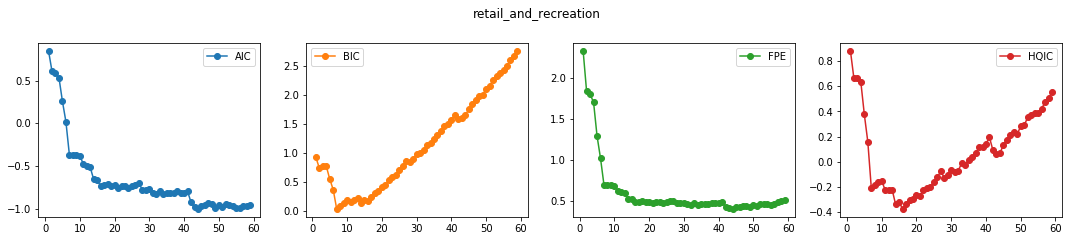

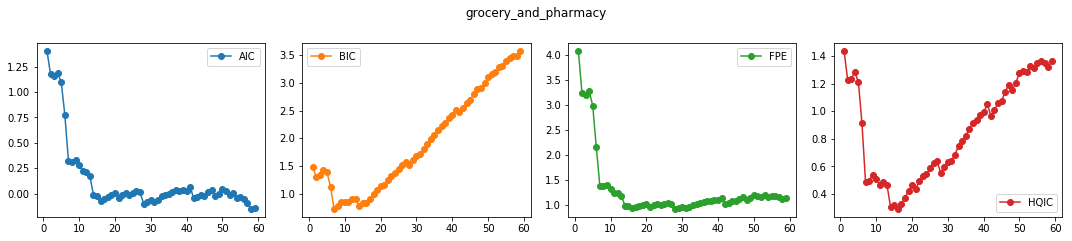

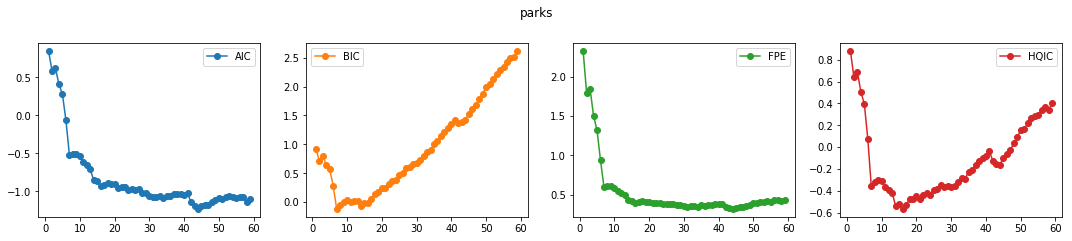

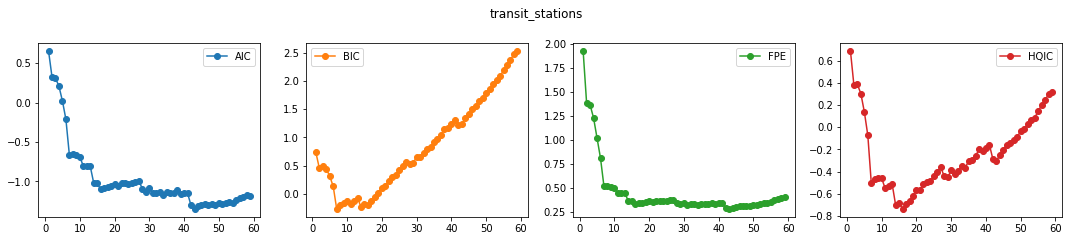

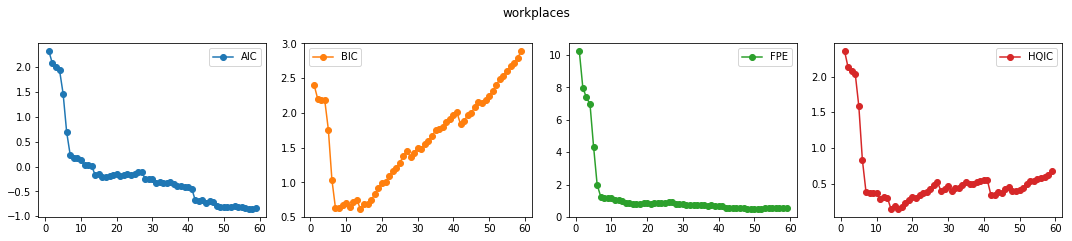

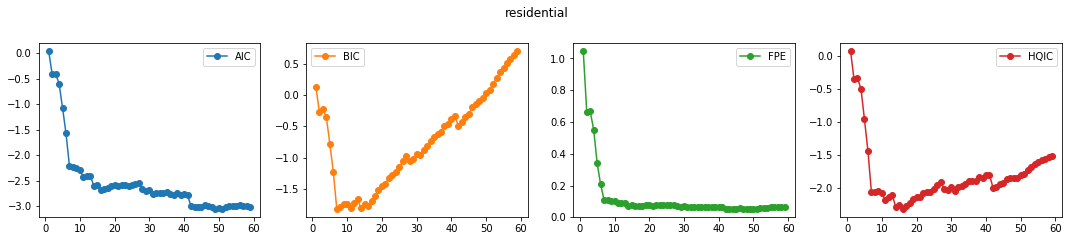

In [114]:
for f in features[:-1]:
    sel_cols_p = [f, 'Covid cases']
    select_p(train_df[sel_cols_p])
    plt.suptitle(f,y=1.1);

In [115]:
p = 7
model = VAR(train_df)
var_model = model.fit(p)

#### Granger Causality Test

**Recall:** If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

**Results**: For this particular dataset, ONLY **changes in `grocery_and_pharmacy` mobility DOES NOT Granger cause changes in `Covid cases`**. All the other mobility locations have more impact to increase Covid cases.

In [116]:
for f in features[:-1]:
    sel_cols_p = [f, 'Covid cases']
    
    print(f)
    df_gmat = granger_causation_matrix(train_df[sel_cols_p], train_df[sel_cols_p].columns, p)  
    print(df_gmat)
    
    granger_conclusion(df_gmat)
    print("=======================================================")

retail_and_recreation
                         retail_and_recreation_x  Covid cases_x
retail_and_recreation_y                      1.0            0.0
Covid cases_y                                0.0            1.0
retail_and_recreation_x Granger causes Covid cases_y
Covid cases_x Granger causes retail_and_recreation_y
grocery_and_pharmacy
                        grocery_and_pharmacy_x  Covid cases_x
grocery_and_pharmacy_y                  1.0000         0.0427
Covid cases_y                           0.0981         1.0000
grocery_and_pharmacy_x does NOT Granger Covid cases_y
Covid cases_x Granger causes grocery_and_pharmacy_y
parks
               parks_x  Covid cases_x
parks_y            1.0            0.0
Covid cases_y      0.0            1.0
parks_x Granger causes Covid cases_y
Covid cases_x Granger causes parks_y
transit_stations
                    transit_stations_x  Covid cases_x
transit_stations_y                 1.0            0.0
Covid cases_y                      0.0          

### Practice 1: M5 forecasting challenge dataset - Walmart products sales

* Set 1 - 16-18, 16-46
* Set 2 - 18-46, 18-54
* Set 3 - 46-54, 46-85
* Set 4 -  54-85, 54-86
* Set 5 - 85-86, 85-206
* Set 6 - 86-206, 16-206
* Set 7 - 18-86, 46-86

#### Import dataset

In [117]:
# from folder
PATH = '../data/m5/processed/'
df_m5 = pd.read_csv(PATH + "m5_foods_1_ca1_practice.csv", index_col="Week Number")

# from google drive
# url='https://drive.google.com/file/d/1P_OkrawM3FYsRApCw0fu-z1AChElhilR/view?usp=sharing'
# file_id=url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?id=' + file_id
# df_m5 = pd.read_csv(dwn_url, index_col="Week Number")

df_m5.head()

,FOODS_1_016,FOODS_1_018,FOODS_1_046,FOODS_1_054,FOODS_1_085,FOODS_1_086,FOODS_1_206
Week Number,,,,,,,
1,4,17,0,0,10,0,3
2,1,3,0,1,15,3,4
3,0,8,0,0,13,3,4
4,1,2,5,11,5,5,2
5,4,5,4,1,11,1,3


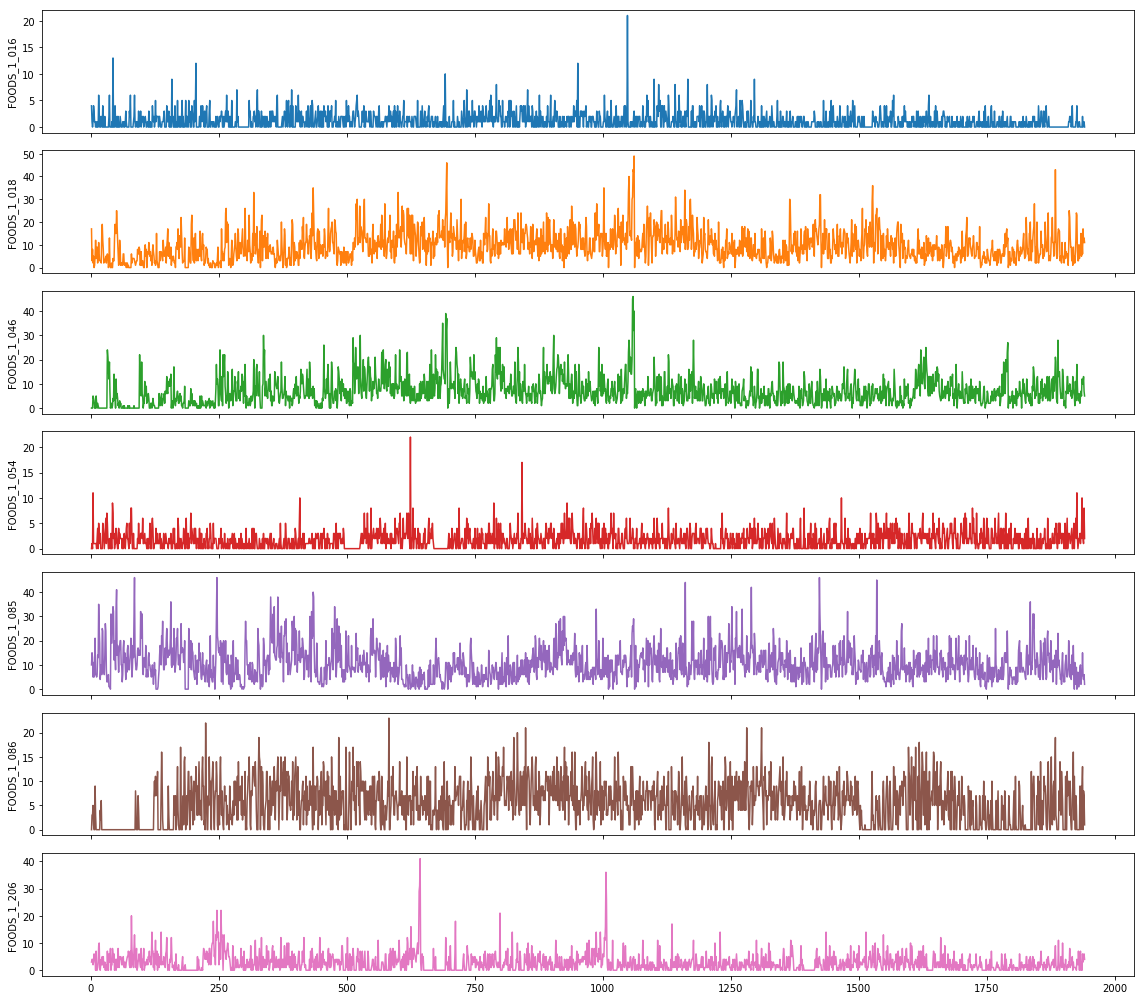

In [118]:
features = df_m5.columns

fig,ax = plt.subplots(len(features), figsize=(16,len(features)*2), sharex=True)
plot_cols = features
df_m5[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

## Summary

We have introduced the notion of causality in this chapter, and discussed its implications on time series analysis. We performed tests to validate the assumptions and limitations of usage of Granger Causality Test. 

We also applied the Granger Causality Test for linear VAR models for several datasets, seeing different examples of causality between the variables explored.

## References

The contents of this notebook are based on the following references:

* [Granger, C. (1969). Investigating Causal Relations by Econometric Models and Cross-spectral Methods. Econometrica, 37(3), 424-438.](https://www.jstor.org/stable/1912791)
* [Silvia, J., Iqbal, A., Swankoski, K., Watt, S., &amp; Bullard, S. (2014). CHAPTER 5: Characterizing a Relationship between Time Series. In Economic and Business Forecasting: Analyzing and Interpreting Econometric Results. chapter, Wiley.](https://www.wiley.com/en-do/Economic+and+Business+Forecasting%3A+Analyzing+and+Interpreting+Econometric+Results-p-9781118497098) Retrieved November 2, 2021, from https://learning.oreilly.com/library/view/economic-and-business/9781118497098/12_chapter05.html.
* Sugihara, G., May, R., Ye, H., Hsieh, C.-H., Deyle, E., Fogarty, M. and Munch, S. (2012). Detecting causality in complex ecosystems. Science, 338 (6106), 496-500
* [AIM PhD in DS Batch 2023 Handbook](https://github.com/phdinds-aim/time_series_handbook)
